# NFL Sports Betting Capstone
_By Justin Tunley_

#### Table of Contents:
1. Introduction
2. Data Scraping
2. EDA and Preprocessing
3. Modeling
4. Model Evaluation

**DataSets:**
1. **hist_df**
- historical data sets 2004-2022
2. **season_df**
- In-season data set
3. **weather**
- weather for every game since 1960

**Team abbreviations:** <br>
Cardinals - ari <br>
Falcons - atl <br>
Ravens - bal<br>
Bills - buf<br>
Panthers - car<br>
Bears - chi<br>
Bengals - cin<br>
Browns - cle<br>
Cowboys - dal<br>
Broncos - den<br>
Lions - det<br>
Packers - gb<br>
Texans - hou<br>
Colts - ind<br>
Jaguars - jax<br>
Chiefs - kc<br>
Raiders - lv<br>
Chargers - lac<br>
Rams - lar<br>
Dolphins - mia<br>
Vikings - min<br>
Patriots - ne<br>
Saints - no<br>
Giants - nyg<br>
Jets - nyj<br>
Eagles - phi<br>
Steelers - pit<br>
49ers - sf<br>
Seahawks - sea<br>
Buccaneers - tb<br>
Titans - ten<br>
Commanders - wsh

In [2]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sportsreference as csr
import html5lib

import requests
from bs4 import BeautifulSoup

## Scraping from ESPN
#### This will be used for the bulk of our information

In [5]:
jets23 = pd.read_html('https://www.espn.com/nfl/team/stats/_/type/team/name/nyj')
# scraping data for THIS SEASON for the New York Jets

In [6]:
jets23[1].index = list(str(x[0]) for x in jets23[0].values)
jets23[1]
# 4 Goals: 
#    1. Split up offensive and defensive stats
#    2. Get each into a single row
#    3. Renaming columns
#    4. Dropping header rows

,NY Jets,Opponents
Total Points Per Game,18.0,18.4
Total Points,126,129
Total Touchdowns,10,11
1st Downs,NaN,NaN
Total 1st downs,102,140
Rushing 1st downs,34,53
Passing 1st downs,58,71
1st downs by penalty,10,16
3rd down efficiency,20-87,42-105
3rd down %,22.99,40.00


**Link to in-season data:**<br>

Jets 2023: https://www.espn.com/nfl/team/stats/_/type/team/name/nyj
    
Template: https://www.espn.com/nfl/team/stats/_/type/team/name/ ... **abbrev**
                                                            

**Link to historical data:**<br>

Jets 2022: https://www.espn.com/nfl/team/stats/_/type/team/name/nyj/season/2022/seasontype/2
    
Template: https://www.espn.com/nfl/team/stats/_/type/team/name/ **team** /season/  **year**  /seasontype/2


In [7]:
big_string='''
Cardinals - ari <br>
Falcons - atl <br>
Ravens - bal<br>
Bills - buf<br>
Panthers - car<br>
Bears - chi<br>
Bengals - cin<br>
Browns - cle<br>
Cowboys - dal<br>
Broncos - den<br>
Lions - det<br>
Packers - gb<br>
Texans - hou<br>
Colts - ind<br>
Jaguars - jax<br>
Chiefs - kc<br>
Raiders - lv<br>
Chargers - lac<br>
Rams - lar<br>
Dolphins - mia<br>
Vikings - min<br>
Patriots - ne<br>
Saints - no<br>
Giants - nyg<br>
Jets - nyj<br>
Eagles - phi<br>
Steelers - pit<br>
49ers - sf<br>
Seahawks - sea<br>
Buccaneers - tb<br>
Titans - ten<br>
Commanders - wsh
'''

In [8]:
abbrev = big_string.replace('<br>', '').split()[2::3]
abbrev

['ari',
 'atl',
 'bal',
 'buf',
 'car',
 'chi',
 'cin',
 'cle',
 'dal',
 'den',
 'det',
 'gb',
 'hou',
 'ind',
 'jax',
 'kc',
 'lv',
 'lac',
 'lar',
 'mia',
 'min',
 'ne',
 'no',
 'nyg',
 'nyj',
 'phi',
 'pit',
 'sf',
 'sea',
 'tb',
 'ten',
 'wsh']

In [9]:
# def get_season_df(team,season):
#         template = 'https://www.espn.com/nfl/team/stats/_/type/team/name/nyj/season/2022/seasontype/2'
#         url = template.format(team,season)
#         df_list = pd.read_html(url)
#         df_list[1].index=list(str(x[0]) for x in df_list[0].values)
#         new_columns = ['Offense--{}-{}'.format(team,season),'Opposing-offense-{}-{}'.format(team,season)]
#         df_list[1].columns = new_columns
#         return df_list[1]

# Repeats Arizona 2004 in every single row: break up string

In [71]:
def get_season_df(team,season):
        template1 = 'https://www.espn.com/nfl/team/stats/_/type/team/name/'
        template2 = '/season/'
        template3 = '/seasontype/2'
        url = template1 + team + template2 + str(season) + template3
        print(url)
        df_list = pd.read_html(url)
        
        df_list[1].index=list(str(x[0]) for x in df_list[0].values)
        new_columns = ['Offense--{}-{}'.format(team,season),'Opposing-offense-{}-{}'.format(team,season)]
        df_list[1].columns = new_columns
        return df_list[1]

In [72]:
all_df = []
for team in abbrev:
    for year in range(2004,2023):
            new_df = get_season_df(team,year)
            all_df.append(new_df)

https://www.espn.com/nfl/team/stats/_/type/team/name/ari/season/2004/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ari/season/2005/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ari/season/2006/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ari/season/2007/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ari/season/2008/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ari/season/2009/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ari/season/2010/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ari/season/2011/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ari/season/2012/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ari/season/2013/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ari/season/2014/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ari/season/2015/seasontype/2
https://www.espn

https://www.espn.com/nfl/team/stats/_/type/team/name/chi/season/2010/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/chi/season/2011/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/chi/season/2012/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/chi/season/2013/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/chi/season/2014/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/chi/season/2015/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/chi/season/2016/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/chi/season/2017/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/chi/season/2018/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/chi/season/2019/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/chi/season/2020/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/chi/season/2021/seasontype/2
https://www.espn

https://www.espn.com/nfl/team/stats/_/type/team/name/det/season/2015/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/det/season/2016/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/det/season/2017/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/det/season/2018/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/det/season/2019/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/det/season/2020/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/det/season/2021/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/det/season/2022/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/gb/season/2004/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/gb/season/2005/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/gb/season/2006/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/gb/season/2007/seasontype/2
https://www.espn.com

https://www.espn.com/nfl/team/stats/_/type/team/name/kc/season/2021/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/kc/season/2022/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/lv/season/2004/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/lv/season/2005/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/lv/season/2006/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/lv/season/2007/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/lv/season/2008/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/lv/season/2009/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/lv/season/2010/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/lv/season/2011/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/lv/season/2012/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/lv/season/2013/seasontype/2
https://www.espn.com/nfl/tea

https://www.espn.com/nfl/team/stats/_/type/team/name/ne/season/2009/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ne/season/2010/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ne/season/2011/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ne/season/2012/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ne/season/2013/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ne/season/2014/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ne/season/2015/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ne/season/2016/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ne/season/2017/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ne/season/2018/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ne/season/2019/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/ne/season/2020/seasontype/2
https://www.espn.com/nfl/tea

https://www.espn.com/nfl/team/stats/_/type/team/name/pit/season/2015/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/pit/season/2016/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/pit/season/2017/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/pit/season/2018/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/pit/season/2019/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/pit/season/2020/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/pit/season/2021/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/pit/season/2022/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/sf/season/2004/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/sf/season/2005/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/sf/season/2006/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/sf/season/2007/seasontype/2
https://www.espn.com

https://www.espn.com/nfl/team/stats/_/type/team/name/wsh/season/2021/seasontype/2
https://www.espn.com/nfl/team/stats/_/type/team/name/wsh/season/2022/seasontype/2


In [97]:
hist_df = pd.concat(all_df, axis=1).T
hist_df.head()
# LETS GOOOOOOOOOO

,Total Points Per Game,Total Points,Total Touchdowns,1st Downs,Total 1st downs,Rushing 1st downs,Passing 1st downs,1st downs by penalty,3rd down efficiency,3rd down %,4th down efficiency,4th down %,Passing,Comp-Att,Net Passing Yards,Yards Per Pass Attempt,Net Passing Yards Per Game,Passing Touchdowns,Interceptions,Sacks-Yards Lost,Rushing,Rushing Attempts,Rushing Yards,Yards Per Rush Attempt,Rushing Yards Per Game,Rushing Touchdowns,Offense,Total Offensive Plays,Total Yards,Yards Per Game,Returns,Kickoffs: Total,Average Kickoff Return Yards,Punt: Total,Average Punt Return Yards,INT: Total,Average Interception Yards,Kicking,Net Average Punt Yards,Punt: Total Yards,FG: Good-Attempts,Touchback Percentage,Penalties,Total-Yards,Avg. Per Game (YDS),Time of Possession,Possession Time Seconds,Miscellaneous,Fumbles-Lost,Turnover Ratio
Offense--ari-2004,17.6,282,31,NaN,280,86,152,42,84-241,34.86,5-12,41.67,NaN,299-533,2882,6.0,180.1,14,18,39-320,NaN,475,1668,3.5,104.3,15,NaN,1047,4870,304.4,NaN,"46-1,017",22.1,49-329,8.7,15-214,14.3,NaN,38.2,"98-4,230",22-29,33,NaN,124-948,59,NaN,31:12,NaN,32-9,0
Opposing-offense-ari-2004,16.1,322,35,NaN,282,101,153,28,66-209,31.58,8-14,57.14,NaN,271-505,3036,6.5,189.8,18,15,38-229,NaN,450,2105,4.7,131.6,12,NaN,993,5370,335.6,NaN,"65-1,293",19.9,56-486,6.7,18-263,14.6,NaN,38.9,"96-4,064",25-26,12,NaN,"139-1,121",70.063,NaN,29:24,NaN,30-14,0
Offense--ari-2005,19.4,311,26,NaN,304,58,224,22,91-239,38.08,5-16,31.25,NaN,419-670,4437,7.0,277.3,21,21,45-286,NaN,360,1138,3.2,71.1,2,NaN,1075,5861,366.3,NaN,"60-1,700",28.3,50-383,8.4,15-285,19.0,NaN,39.4,"73-3,206",43-45,27,NaN,"145-1,184",74,NaN,31:19,NaN,25-14,0
Opposing-offense-ari-2005,18.4,387,46,NaN,272,83,158,31,67-196,34.18,4-11,36.36,NaN,301-488,3097,6.8,193.6,17,15,37-217,NaN,411,1632,4.0,102.0,22,NaN,936,4946,309.1,NaN,"76-1,719",22.6,39-328,7.7,21-334,15.9,NaN,39.6,"85-3,752",21-24,6,NaN,103-819,51.188,NaN,28:40,NaN,23-11,0
Offense--ari-2006,19.6,314,33,NaN,298,84,187,27,83-212,39.15,10-15,66.67,NaN,322-545,3662,7.2,228.9,17,17,35-262,NaN,419,1338,3.2,83.6,12,NaN,999,5262,328.9,NaN,"58-1,481",25.5,25-250,12.8,16-350,21.9,NaN,36.4,"66-2,965",28-37,22,NaN,117-937,58,NaN,29:58,NaN,30-10,0


## Data Preprocessing and Cleaning

In [98]:
hist_df.shape
# MAKE SURE YOU ARE COMPLETELY DONE SCRAPING BEFORE CONCATENATING
# YOU WILL NOT GET AN ERROR MESSAGE, YOU WILL JUST BE MISSING ROWS. MAKE SURE SHAPE IS 1216 X 50

(1216, 50)

In [99]:
pd.set_option('display.max_columns',None)
# so that we can view all columns

In [114]:
hist_df.to_csv('NFL_Raw_Stats_Hist.csv')

In [101]:
hist_df.tail()
# not organized by year, so can't just grab the last 'x' rows

,Total Points Per Game,Total Points,Total Touchdowns,1st Downs,Total 1st downs,Rushing 1st downs,Passing 1st downs,1st downs by penalty,3rd down efficiency,3rd down %,4th down efficiency,4th down %,Passing,Comp-Att,Net Passing Yards,Yards Per Pass Attempt,Net Passing Yards Per Game,Passing Touchdowns,Interceptions,Sacks-Yards Lost,Rushing,Rushing Attempts,Rushing Yards,Yards Per Rush Attempt,Rushing Yards Per Game,Rushing Touchdowns,Offense,Total Offensive Plays,Total Yards,Yards Per Game,Returns,Kickoffs: Total,Average Kickoff Return Yards,Punt: Total,Average Punt Return Yards,INT: Total,Average Interception Yards,Kicking,Net Average Punt Yards,Punt: Total Yards,FG: Good-Attempts,Touchback Percentage,Penalties,Total-Yards,Avg. Per Game (YDS),Time of Possession,Possession Time Seconds,Miscellaneous,Fumbles-Lost,Turnover Ratio,Games
Opposing-offense-wsh-2020,20.6,329,37,NaN,289,100,161,28,81-216,37.50,9-24,37.50,NaN,330-529,3068,6.4,191.8,21,16,47-325,NaN,428,1805,4.2,112.8,14,NaN,1004,5198,324.9,NaN,31-645,20.8,36-209,5.7,16-181,11.3,NaN,43.8,"73-3,370",24-27,60,NaN,85-708,44.25,NaN,30:05,NaN,19-7,4,16
Offense--wsh-2021,19.7,335,37,NaN,345,129,181,35,87-224,38.84,16-32,50.00,NaN,356-550,3441,6.8,202.4,21,15,43-305,NaN,477,2061,4.3,121.2,13,NaN,1070,5807,341.6,NaN,36-904,25.1,16-134,9.0,11-120,10.9,NaN,43.5,"62-2,985",28-33,59,NaN,82-743,43,NaN,30:43,NaN,25-9,-5,16
Opposing-offense-wsh-2021,25.5,434,51,NaN,346,101,220,25,111-229,48.47,12-20,60.00,NaN,400-597,4333,7.6,254.9,34,11,38-187,NaN,430,1775,4.1,104.4,14,NaN,1065,6295,370.3,NaN,30-643,21.4,27-244,8.4,15-127,8.5,NaN,44.3,"63-2,924",27-29,58,NaN,96-803,47.235,NaN,29:16,NaN,18-8,301,16
Offense--wsh-2022,18.9,321,36,NaN,339,124,184,31,81-230,35.22,12-25,48.00,NaN,344-554,3472,6.8,204.2,24,16,48-311,NaN,538,2143,4.0,126.1,9,NaN,1140,5926,348.6,NaN,41-902,22.0,44-336,6.4,9-68,7.6,NaN,44.2,"83-3,885",25-30,77,NaN,92-805,47,NaN,33:21,NaN,21-7,-5,16
Opposing-offense-wsh-2022,20.2,343,38,NaN,286,102,155,29,67-210,31.91,12-25,48.00,NaN,308-514,3252,6.9,191.3,26,9,43-279,NaN,441,1926,4.4,113.3,10,NaN,998,5457,321.0,NaN,15-350,23.3,34-219,7.6,16-141,8.8,NaN,43.7,"87-4,137",26-29,47,NaN,85-707,41.588,NaN,27:13,NaN,17-9,317,16


In [102]:
hist_df.columns

Index(['Total Points Per Game', 'Total Points', 'Total Touchdowns',
       '1st Downs', 'Total 1st downs', 'Rushing 1st downs',
       'Passing 1st downs', '1st downs by penalty', '3rd down efficiency',
       '3rd down %', '4th down efficiency', '4th down %', 'Passing',
       'Comp-Att', 'Net Passing Yards', 'Yards Per Pass Attempt',
       'Net Passing Yards Per Game', 'Passing Touchdowns', 'Interceptions',
       'Sacks-Yards Lost', 'Rushing', 'Rushing Attempts', 'Rushing Yards',
       'Yards Per Rush Attempt', 'Rushing Yards Per Game',
       'Rushing Touchdowns', 'Offense', 'Total Offensive Plays', 'Total Yards',
       'Yards Per Game', 'Returns', 'Kickoffs: Total',
       'Average Kickoff Return Yards', 'Punt: Total',
       'Average Punt Return Yards', 'INT: Total', 'Average Interception Yards',
       'Kicking', 'Net Average Punt Yards', 'Punt: Total Yards',
       'FG: Good-Attempts', 'Touchback Percentage', 'Penalties', 'Total-Yards',
       'Avg. Per Game (YDS)', 'Time of

In [103]:
#setting index as a column instead for easy manipulation 
hist_df = hist_df.reset_index()
hist_df.rename(columns={'index':'SeasonID'}, inplace=True) #renaming new column 

In [104]:
hist_df

,SeasonID,Total Points Per Game,Total Points,Total Touchdowns,1st Downs,Total 1st downs,Rushing 1st downs,Passing 1st downs,1st downs by penalty,3rd down efficiency,3rd down %,4th down efficiency,4th down %,Passing,Comp-Att,Net Passing Yards,Yards Per Pass Attempt,Net Passing Yards Per Game,Passing Touchdowns,Interceptions,Sacks-Yards Lost,Rushing,Rushing Attempts,Rushing Yards,Yards Per Rush Attempt,Rushing Yards Per Game,Rushing Touchdowns,Offense,Total Offensive Plays,Total Yards,Yards Per Game,Returns,Kickoffs: Total,Average Kickoff Return Yards,Punt: Total,Average Punt Return Yards,INT: Total,Average Interception Yards,Kicking,Net Average Punt Yards,Punt: Total Yards,FG: Good-Attempts,Touchback Percentage,Penalties,Total-Yards,Avg. Per Game (YDS),Time of Possession,Possession Time Seconds,Miscellaneous,Fumbles-Lost,Turnover Ratio,Games
0,Offense--ari-2004,17.6,282,31,NaN,280,86,152,42,84-241,34.86,5-12,41.67,NaN,299-533,2882,6.0,180.1,14,18,39-320,NaN,475,1668,3.5,104.3,15,NaN,1047,4870,304.4,NaN,"46-1,017",22.1,49-329,8.7,15-214,14.3,NaN,38.2,"98-4,230",22-29,33,NaN,124-948,59,NaN,31:12,NaN,32-9,0,16
1,Opposing-offense-ari-2004,16.1,322,35,NaN,282,101,153,28,66-209,31.58,8-14,57.14,NaN,271-505,3036,6.5,189.8,18,15,38-229,NaN,450,2105,4.7,131.6,12,NaN,993,5370,335.6,NaN,"65-1,293",19.9,56-486,6.7,18-263,14.6,NaN,38.9,"96-4,064",25-26,12,NaN,"139-1,121",70.063,NaN,29:24,NaN,30-14,0,16
2,Offense--ari-2005,19.4,311,26,NaN,304,58,224,22,91-239,38.08,5-16,31.25,NaN,419-670,4437,7.0,277.3,21,21,45-286,NaN,360,1138,3.2,71.1,2,NaN,1075,5861,366.3,NaN,"60-1,700",28.3,50-383,8.4,15-285,19.0,NaN,39.4,"73-3,206",43-45,27,NaN,"145-1,184",74,NaN,31:19,NaN,25-14,0,16
3,Opposing-offense-ari-2005,18.4,387,46,NaN,272,83,158,31,67-196,34.18,4-11,36.36,NaN,301-488,3097,6.8,193.6,17,15,37-217,NaN,411,1632,4.0,102.0,22,NaN,936,4946,309.1,NaN,"76-1,719",22.6,39-328,7.7,21-334,15.9,NaN,39.6,"85-3,752",21-24,6,NaN,103-819,51.188,NaN,28:40,NaN,23-11,0,16
4,Offense--ari-2006,19.6,314,33,NaN,298,84,187,27,83-212,39.15,10-15,66.67,NaN,322-545,3662,7.2,228.9,17,17,35-262,NaN,419,1338,3.2,83.6,12,NaN,999,5262,328.9,NaN,"58-1,481",25.5,25-250,12.8,16-350,21.9,NaN,36.4,"66-2,965",28-37,22,NaN,117-937,58,NaN,29:58,NaN,30-10,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,Opposing-offense-wsh-2020,20.6,329,37,NaN,289,100,161,28,81-216,37.50,9-24,37.50,NaN,330-529,3068,6.4,191.8,21,16,47-325,NaN,428,1805,4.2,112.8,14,NaN,1004,5198,324.9,NaN,31-645,20.8,36-209,5.7,16-181,11.3,NaN,43.8,"73-3,370",24-27,60,NaN,85-708,44.25,NaN,30:05,NaN,19-7,4,16
1212,Offense--wsh-2021,19.7,335,37,NaN,345,129,181,35,87-224,38.84,16-32,50.00,NaN,356-550,3441,6.8,202.4,21,15,43-305,NaN,477,2061,4.3,121.2,13,NaN,1070,5807,341.6,NaN,36-904,25.1,16-134,9.0,11-120,10.9,NaN,43.5,"62-2,985",28-33,59,NaN,82-743,43,NaN,30:43,NaN,25-9,-5,16
1213,Opposing-offense-wsh-2021,25.5,434,51,NaN,346,101,220,25,111-229,48.47,12-20,60.00,NaN,400-597,4333,7.6,254.9,34,11,38-187,NaN,430,1775,4.1,104.4,14,NaN,1065,6295,370.3,NaN,30-643,21.4,27-244,8.4,15-127,8.5,NaN,44.3,"63-2,924",27-29,58,NaN,96-803,47.235,NaN,29:16,NaN,18-8,301,16
1214,Offense--wsh-2022,18.9,321,36,NaN,339,124,184,31,81-230,35.22,12-25,48.00,NaN,344-554,3472,6.8,204.2,24,16,48-311,NaN,538,2143,4.0,126.1,9,NaN,1140,5926,348.6,NaN,41-902,22.0,44-336,6.4,9-68,7.6,NaN,44.2,"83-3,885",25-30,77,NaN,92-805,47,NaN,33:21,NaN,21-7,-5,16


In [121]:
hist_df['Games'] = 16
# Set all seasons to 16 games. In the next step, we will fix 2021 and 2022

In [118]:
hackDF = hist_df["SeasonID"].str.split('-', expand=True)
hist_df['Year'] = hackDF[3]
# Splitting the string in SeasonID on '-' and breaking it up in a new dataframe. We can then select the 4th column from
# that dataframe and use it to create new column in our main dataframe that represents year. 

In [122]:
hist_df.loc[(hist_df['Year']=='2021') | (hist_df['Year']=='2022') , 'Games'] = 17
# If year is 2021 or 2022, set games to 17

In [126]:
hist_df.tail()
hist_df['Games'].value_counts()
# 32 teams X 2 rows per team per season X 2 seasons = 128 so we are good 

16    1088
17     128
Name: Games, dtype: int64

In [ ]:
# Currently, each team has 2 rows per season, one displaying offense and one displaying opposing offense (defense)
# We will be combining these into one row per team.

In [141]:
# New dataframe for just the offense
offDF = hist_df.loc[hist_df['SeasonID'].str.contains('Offense--'),:]

In [142]:
# New dataframe for just the defense
defDF = hist_df.loc[hist_df['SeasonID'].str.contains('Opposing-'),:]

In [143]:
offDF.reset_index(inplace=True)
offDF.drop(columns='index')

,SeasonID,Total Points Per Game,Total Points,Total Touchdowns,1st Downs,Total 1st downs,Rushing 1st downs,Passing 1st downs,1st downs by penalty,3rd down efficiency,3rd down %,4th down efficiency,4th down %,Passing,Comp-Att,Net Passing Yards,Yards Per Pass Attempt,Net Passing Yards Per Game,Passing Touchdowns,Interceptions,Sacks-Yards Lost,Rushing,Rushing Attempts,Rushing Yards,Yards Per Rush Attempt,Rushing Yards Per Game,Rushing Touchdowns,Offense,Total Offensive Plays,Total Yards,Yards Per Game,Returns,Kickoffs: Total,Average Kickoff Return Yards,Punt: Total,Average Punt Return Yards,INT: Total,Average Interception Yards,Kicking,Net Average Punt Yards,Punt: Total Yards,FG: Good-Attempts,Touchback Percentage,Penalties,Total-Yards,Avg. Per Game (YDS),Time of Possession,Possession Time Seconds,Miscellaneous,Fumbles-Lost,Turnover Ratio,Games,Year
0,Offense--ari-2004,17.6,282,31,NaN,280,86,152,42,84-241,34.86,5-12,41.67,NaN,299-533,2882,6.0,180.1,14,18,39-320,NaN,475,1668,3.5,104.3,15,NaN,1047,4870,304.4,NaN,"46-1,017",22.1,49-329,8.7,15-214,14.3,NaN,38.2,"98-4,230",22-29,33,NaN,124-948,59,NaN,31:12,NaN,32-9,0,16,2004
1,Offense--ari-2005,19.4,311,26,NaN,304,58,224,22,91-239,38.08,5-16,31.25,NaN,419-670,4437,7.0,277.3,21,21,45-286,NaN,360,1138,3.2,71.1,2,NaN,1075,5861,366.3,NaN,"60-1,700",28.3,50-383,8.4,15-285,19.0,NaN,39.4,"73-3,206",43-45,27,NaN,"145-1,184",74,NaN,31:19,NaN,25-14,0,16,2005
2,Offense--ari-2006,19.6,314,33,NaN,298,84,187,27,83-212,39.15,10-15,66.67,NaN,322-545,3662,7.2,228.9,17,17,35-262,NaN,419,1338,3.2,83.6,12,NaN,999,5262,328.9,NaN,"58-1,481",25.5,25-250,12.8,16-350,21.9,NaN,36.4,"66-2,965",28-37,22,NaN,117-937,58,NaN,29:58,NaN,30-10,0,16,2006
3,Offense--ari-2007,25.3,404,49,NaN,308,70,210,28,75-203,36.95,12-14,85.71,NaN,356-590,4065,7.2,254.1,32,24,24-163,NaN,402,1440,3.6,90.0,9,NaN,1016,5668,354.3,NaN,"60-1,389",23.2,42-395,13.1,18-551,30.6,NaN,34.2,"79-3,198",21-30,21,NaN,"137-1,128",70,NaN,30:39,NaN,26-11,0,16,2007
4,Offense--ari-2008,26.7,427,51,NaN,328,72,231,25,83-198,41.92,8-16,50.00,NaN,418-630,4674,7.7,292.1,31,15,28-201,NaN,340,1178,3.5,73.6,14,NaN,998,6053,378.3,NaN,"69-1,724",25.0,33-237,13.1,13-321,24.7,NaN,35.5,"60-2,509",25-28,17,NaN,107-781,48,NaN,30:10,NaN,24-13,0,16,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,Offense--wsh-2018,17.6,281,29,NaN,280,96,156,28,75-206,36.41,10-18,55.56,NaN,311-509,3021,6.5,188.8,16,15,44-266,NaN,414,1774,4.3,110.9,12,NaN,967,5061,316.3,NaN,13-295,22.7,17-110,9.8,15-203,13.5,NaN,41.5,"79-3,581",26-29,80,NaN,"115-1,008",63,NaN,29:37,NaN,18-4,7,16,2018
604,Offense--wsh-2019,16.6,266,28,NaN,248,74,154,20,52-179,29.05,6-14,42.86,NaN,298-479,2812,6.7,175.8,18,13,50-393,NaN,356,1583,4.4,98.9,9,NaN,885,4788,299.3,NaN,17-439,25.8,22-104,9.1,13-106,8.2,NaN,45.1,"79-3,919",25-30,71,NaN,106-835,52,NaN,27:11,NaN,21-8,1,16,2019
605,Offense--wsh-2020,20.9,335,37,NaN,322,108,184,30,88-225,39.11,11-19,57.90,NaN,389-601,3465,6.3,216.6,16,16,50-331,NaN,400,1611,4.0,100.7,18,NaN,1051,5407,337.9,NaN,9-235,26.1,31-176,5.8,16-136,8.5,NaN,45.1,"73-3,504",27-34,83,NaN,87-697,43,NaN,29:54,NaN,24-11,-4,16,2020
606,Offense--wsh-2021,19.7,335,37,NaN,345,129,181,35,87-224,38.84,16-32,50.00,NaN,356-550,3441,6.8,202.4,21,15,43-305,NaN,477,2061,4.3,121.2,13,NaN,1070,5807,341.6,NaN,36-904,25.1,16-134,9.0,11-120,10.9,NaN,43.5,"62-2,985",28-33,59,NaN,82-743,43,NaN,30:43,NaN,25-9,-5,17,2021


In [145]:
offNames = list('OFF_{}'.format(col) for col in offDF.columns)
# renaming all column headers in this dataframe to begin with off_. This is important for distinguishing between columns
# of the same name when we re-concatenate.

In [155]:
offDF.columns = offNames

In [156]:
offDF.head()

,OFF_index,OFF_SeasonID,OFF_Total Points Per Game,OFF_Total Points,OFF_Total Touchdowns,OFF_1st Downs,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Passing,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Offense,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Returns,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Kicking,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Penalties,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Time of Possession,OFF_Possession Time Seconds,OFF_Miscellaneous,OFF_Fumbles-Lost,OFF_Turnover Ratio,OFF_Games,OFF_Year
0,0,Offense--ari-2004,17.6,282,31,NaN,280,86,152,42,84-241,34.86,5-12,41.67,NaN,299-533,2882,6.0,180.1,14,18,39-320,NaN,475,1668,3.5,104.3,15,NaN,1047,4870,304.4,NaN,"46-1,017",22.1,49-329,8.7,15-214,14.3,NaN,38.2,"98-4,230",22-29,33,NaN,124-948,59,NaN,31:12,NaN,32-9,0,16,2004
1,2,Offense--ari-2005,19.4,311,26,NaN,304,58,224,22,91-239,38.08,5-16,31.25,NaN,419-670,4437,7.0,277.3,21,21,45-286,NaN,360,1138,3.2,71.1,2,NaN,1075,5861,366.3,NaN,"60-1,700",28.3,50-383,8.4,15-285,19.0,NaN,39.4,"73-3,206",43-45,27,NaN,"145-1,184",74,NaN,31:19,NaN,25-14,0,16,2005
2,4,Offense--ari-2006,19.6,314,33,NaN,298,84,187,27,83-212,39.15,10-15,66.67,NaN,322-545,3662,7.2,228.9,17,17,35-262,NaN,419,1338,3.2,83.6,12,NaN,999,5262,328.9,NaN,"58-1,481",25.5,25-250,12.8,16-350,21.9,NaN,36.4,"66-2,965",28-37,22,NaN,117-937,58,NaN,29:58,NaN,30-10,0,16,2006
3,6,Offense--ari-2007,25.3,404,49,NaN,308,70,210,28,75-203,36.95,12-14,85.71,NaN,356-590,4065,7.2,254.1,32,24,24-163,NaN,402,1440,3.6,90.0,9,NaN,1016,5668,354.3,NaN,"60-1,389",23.2,42-395,13.1,18-551,30.6,NaN,34.2,"79-3,198",21-30,21,NaN,"137-1,128",70,NaN,30:39,NaN,26-11,0,16,2007
4,8,Offense--ari-2008,26.7,427,51,NaN,328,72,231,25,83-198,41.92,8-16,50.00,NaN,418-630,4674,7.7,292.1,31,15,28-201,NaN,340,1178,3.5,73.6,14,NaN,998,6053,378.3,NaN,"69-1,724",25.0,33-237,13.1,13-321,24.7,NaN,35.5,"60-2,509",25-28,17,NaN,107-781,48,NaN,30:10,NaN,24-13,0,16,2008


In [144]:
defDF.reset_index(inplace=True)
defDF.drop(columns='index')
# do it again for the defense

,SeasonID,Total Points Per Game,Total Points,Total Touchdowns,1st Downs,Total 1st downs,Rushing 1st downs,Passing 1st downs,1st downs by penalty,3rd down efficiency,3rd down %,4th down efficiency,4th down %,Passing,Comp-Att,Net Passing Yards,Yards Per Pass Attempt,Net Passing Yards Per Game,Passing Touchdowns,Interceptions,Sacks-Yards Lost,Rushing,Rushing Attempts,Rushing Yards,Yards Per Rush Attempt,Rushing Yards Per Game,Rushing Touchdowns,Offense,Total Offensive Plays,Total Yards,Yards Per Game,Returns,Kickoffs: Total,Average Kickoff Return Yards,Punt: Total,Average Punt Return Yards,INT: Total,Average Interception Yards,Kicking,Net Average Punt Yards,Punt: Total Yards,FG: Good-Attempts,Touchback Percentage,Penalties,Total-Yards,Avg. Per Game (YDS),Time of Possession,Possession Time Seconds,Miscellaneous,Fumbles-Lost,Turnover Ratio,Games,Year
0,Opposing-offense-ari-2004,16.1,322,35,NaN,282,101,153,28,66-209,31.58,8-14,57.14,NaN,271-505,3036,6.5,189.8,18,15,38-229,NaN,450,2105,4.7,131.6,12,NaN,993,5370,335.6,NaN,"65-1,293",19.9,56-486,6.7,18-263,14.6,NaN,38.9,"96-4,064",25-26,12,NaN,"139-1,121",70.063,NaN,29:24,NaN,30-14,0,16,2004
1,Opposing-offense-ari-2005,18.4,387,46,NaN,272,83,158,31,67-196,34.18,4-11,36.36,NaN,301-488,3097,6.8,193.6,17,15,37-217,NaN,411,1632,4.0,102.0,22,NaN,936,4946,309.1,NaN,"76-1,719",22.6,39-328,7.7,21-334,15.9,NaN,39.6,"85-3,752",21-24,6,NaN,103-819,51.188,NaN,28:40,NaN,23-11,0,16,2005
2,Opposing-offense-ari-2006,18.5,389,42,NaN,331,114,186,31,83-201,41.29,7-15,46.67,NaN,321-522,3694,7.5,230.9,21,16,38-238,NaN,458,1897,4.1,118.6,16,NaN,1018,5829,364.3,NaN,"73-1,610",22.1,44-562,10.0,17-110,6.5,NaN,40.4,"58-2,596",31-34,13,NaN,95-815,50.938,NaN,30:01,NaN,28-17,0,16,2006
3,Opposing-offense-ari-2007,19.0,399,45,NaN,298,90,185,23,87-218,39.91,7-15,46.67,NaN,361-570,3716,6.9,232.3,26,18,36-242,NaN,407,1567,3.9,97.9,13,NaN,1013,5525,345.3,NaN,"74-1,682",22.7,38-496,9.4,24-380,15.8,NaN,38.2,"73-3,181",28-33,9,NaN,118-881,55.063,NaN,30:19,NaN,23-10,0,16,2007
4,Opposing-offense-ari-2008,20.3,426,52,NaN,312,117,172,23,92-207,44.44,13-17,76.47,NaN,323-517,3540,7.2,221.3,36,13,31-191,NaN,445,1764,4.0,110.3,13,NaN,993,5495,343.4,NaN,"75-1,630",21.7,29-381,7.2,15-276,18.4,NaN,42.3,"60-2,777",21-27,10,NaN,98-816,51,NaN,29:53,NaN,26-15,0,16,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,Opposing-offense-wsh-2018,18.0,359,43,NaN,330,109,197,24,86-196,43.88,5-13,38.46,NaN,362-537,3794,7.6,237.1,27,15,46-297,NaN,413,1860,4.5,116.3,12,NaN,996,5951,371.9,NaN,29-570,19.7,31-303,6.5,15-316,21.1,NaN,44.0,"58-2,660",21-26,61,NaN,102-791,49.438,NaN,30:22,NaN,22-10,-7,16,2018
604,Opposing-offense-wsh-2019,27.2,435,52,NaN,354,120,200,34,111-227,48.90,12-19,63.16,NaN,371-540,3823,7.6,238.9,35,13,46-270,NaN,493,2339,4.7,146.2,14,NaN,1079,6432,402.0,NaN,33-833,25.2,39-354,4.7,13-178,13.7,NaN,41.9,"57-2,536",25-30,61,NaN,94-805,50.313,NaN,33:09,NaN,21-8,-1,16,2019
605,Opposing-offense-wsh-2020,20.6,329,37,NaN,289,100,161,28,81-216,37.50,9-24,37.50,NaN,330-529,3068,6.4,191.8,21,16,47-325,NaN,428,1805,4.2,112.8,14,NaN,1004,5198,324.9,NaN,31-645,20.8,36-209,5.7,16-181,11.3,NaN,43.8,"73-3,370",24-27,60,NaN,85-708,44.25,NaN,30:05,NaN,19-7,4,16,2020
606,Opposing-offense-wsh-2021,25.5,434,51,NaN,346,101,220,25,111-229,48.47,12-20,60.00,NaN,400-597,4333,7.6,254.9,34,11,38-187,NaN,430,1775,4.1,104.4,14,NaN,1065,6295,370.3,NaN,30-643,21.4,27-244,8.4,15-127,8.5,NaN,44.3,"63-2,924",27-29,58,NaN,96-803,47.235,NaN,29:16,NaN,18-8,301,17,2021


In [148]:
defNames = list('DEF_{}'.format(col) for col in defDF.columns)

In [149]:
defDF.columns = defNames

In [150]:
defDF.head()

,DEF_index,DEF_SeasonID,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_1st Downs,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Passing,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Offense,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Returns,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Kicking,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Penalties,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Time of Possession,DEF_Possession Time Seconds,DEF_Miscellaneous,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games,DEF_Year
0,1,Opposing-offense-ari-2004,16.1,322,35,NaN,282,101,153,28,66-209,31.58,8-14,57.14,NaN,271-505,3036,6.5,189.8,18,15,38-229,NaN,450,2105,4.7,131.6,12,NaN,993,5370,335.6,NaN,"65-1,293",19.9,56-486,6.7,18-263,14.6,NaN,38.9,"96-4,064",25-26,12,NaN,"139-1,121",70.063,NaN,29:24,NaN,30-14,0,16,2004
1,3,Opposing-offense-ari-2005,18.4,387,46,NaN,272,83,158,31,67-196,34.18,4-11,36.36,NaN,301-488,3097,6.8,193.6,17,15,37-217,NaN,411,1632,4.0,102.0,22,NaN,936,4946,309.1,NaN,"76-1,719",22.6,39-328,7.7,21-334,15.9,NaN,39.6,"85-3,752",21-24,6,NaN,103-819,51.188,NaN,28:40,NaN,23-11,0,16,2005
2,5,Opposing-offense-ari-2006,18.5,389,42,NaN,331,114,186,31,83-201,41.29,7-15,46.67,NaN,321-522,3694,7.5,230.9,21,16,38-238,NaN,458,1897,4.1,118.6,16,NaN,1018,5829,364.3,NaN,"73-1,610",22.1,44-562,10.0,17-110,6.5,NaN,40.4,"58-2,596",31-34,13,NaN,95-815,50.938,NaN,30:01,NaN,28-17,0,16,2006
3,7,Opposing-offense-ari-2007,19.0,399,45,NaN,298,90,185,23,87-218,39.91,7-15,46.67,NaN,361-570,3716,6.9,232.3,26,18,36-242,NaN,407,1567,3.9,97.9,13,NaN,1013,5525,345.3,NaN,"74-1,682",22.7,38-496,9.4,24-380,15.8,NaN,38.2,"73-3,181",28-33,9,NaN,118-881,55.063,NaN,30:19,NaN,23-10,0,16,2007
4,9,Opposing-offense-ari-2008,20.3,426,52,NaN,312,117,172,23,92-207,44.44,13-17,76.47,NaN,323-517,3540,7.2,221.3,36,13,31-191,NaN,445,1764,4.0,110.3,13,NaN,993,5495,343.4,NaN,"75-1,630",21.7,29-381,7.2,15-276,18.4,NaN,42.3,"60-2,777",21-27,10,NaN,98-816,51,NaN,29:53,NaN,26-15,0,16,2008


In [170]:
defDF.shape

(608, 54)

In [152]:
final_df = pd.merge(offDF, defDF, left_index=True, right_index=True)

In [163]:
final_df.head()

,OFF_index,OFF_SeasonID,OFF_Total Points Per Game,OFF_Total Points,OFF_Total Touchdowns,OFF_1st Downs,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Passing,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Offense,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Returns,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Kicking,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Penalties,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Time of Possession,OFF_Possession Time Seconds,OFF_Miscellaneous,OFF_Fumbles-Lost,OFF_Turnover Ratio,OFF_Games,OFF_Year,DEF_index,DEF_SeasonID,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_1st Downs,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Passing,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Offense,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Returns,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Kicking,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Penalties,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Time of Possession,DEF_Possession Time Seconds,DEF_Miscellaneous,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games,DEF_Year
0,0,Offense--ari-2004,17.6,282,31,NaN,280,86,152,42,84-241,34.86,5-12,41.67,NaN,299-533,2882,6.0,180.1,14,18,39-320,NaN,475,1668,3.5,104.3,15,NaN,1047,4870,304.4,NaN,"46-1,017",22.1,49-329,8.7,15-214,14.3,NaN,38.2,"98-4,230",22-29,33,NaN,124-948,59,NaN,31:12,NaN,32-9,0,16,2004,1,Opposing-offense-ari-2004,16.1,322,35,NaN,282,101,153,28,66-209,31.58,8-14,57.14,NaN,271-505,3036,6.5,189.8,18,15,38-229,NaN,450,2105,4.7,131.6,12,NaN,993,5370,335.6,NaN,"65-1,293",19.9,56-486,6.7,18-263,14.6,NaN,38.9,"96-4,064",25-26,12,NaN,"139-1,121",70.063,NaN,29:24,NaN,30-14,0,16,2004
1,2,Offense--ari-2005,19.4,311,26,NaN,304,58,224,22,91-239,38.08,5-16,31.25,NaN,419-670,4437,7.0,277.3,21,21,45-286,NaN,360,1138,3.2,71.1,2,NaN,1075,5861,366.3,NaN,"60-1,700",28.3,50-383,8.4,15-285,19.0,NaN,39.4,"73-3,206",43-45,27,NaN,"145-1,184",74,NaN,31:19,NaN,25-14,0,16,2005,3,Opposing-offense-ari-2005,18.4,387,46,NaN,272,83,158,31,67-196,34.18,4-11,36.36,NaN,301-488,3097,6.8,193.6,17,15,37-217,NaN,411,1632,4.0,102.0,22,NaN,936,4946,309.1,NaN,"76-1,719",22.6,39-328,7.7,21-334,15.9,NaN,39.6,"85-3,752",21-24,6,NaN,103-819,51.188,NaN,28:40,NaN,23-11,0,16,2005
2,4,Offense--ari-2006,19.6,314,33,NaN,298,84,187,27,83-212,39.15,10-15,66.67,NaN,322-545,3662,7.2,228.9,17,17,35-262,NaN,419,1338,3.2,83.6,12,NaN,999,5262,328.9,NaN,"58-1,481",25.5,25-250,12.8,16-350,21.9,NaN,36.4,"66-2,965",28-37,22,NaN,117-937,58,NaN,29:58,NaN,30-10,0,16,2006,5,Opposing-offense-ari-2006,18.5,389,42,NaN,331,114,186,31,83-201,41.29,7-15,46.67,NaN,321-522,3694,7.5,230.9,21,16,38-238,NaN,458,1897,4.1,118.6,16,NaN,1018,5829,364.3,NaN,"73-1,610",22.1,44-562,10.0,17-110,6.5,NaN,40.4,"58-2,596",31-34,13,NaN,95-815,50.938,NaN,30:01,NaN,28-17,0,16,2006
3,6,Offense--ari-2007,25.3,404,49,NaN,308,70,210,28,75-203,36.95,12-14,85.71,NaN,356-590,4065,7.2,254.1,32,24,24-163,NaN,402,1440,3.6,

In [169]:
final_df.shape

(608, 108)

In [157]:
final_df.duplicated().sum()
# thank god

0

In [173]:
final_df.columns

Index(['OFF_index', 'OFF_SeasonID', 'OFF_Total Points Per Game',
       'OFF_Total Points', 'OFF_Total Touchdowns', 'OFF_1st Downs',
       'OFF_Total 1st downs', 'OFF_Rushing 1st downs', 'OFF_Passing 1st downs',
       'OFF_1st downs by penalty',
       ...
       'DEF_Penalties', 'DEF_Total-Yards', 'DEF_Avg. Per Game (YDS)',
       'DEF_Time of Possession', 'DEF_Possession Time Seconds',
       'DEF_Miscellaneous', 'DEF_Fumbles-Lost', 'DEF_Turnover Ratio',
       'DEF_Games', 'DEF_Year'],
      dtype='object', length=108)

In [172]:
pd.set_option('display.max_rows',None)
final_df.isna().sum()
# this is also good. 1st downs, passing, rushing, offense, returns and all other columns with nulls are headers
# on the original dataset. They describe the columns that follow, and are therefore unnecessary. They can be dropped.

OFF_index                             0
OFF_SeasonID                          0
OFF_Total Points Per Game             0
OFF_Total Points                      0
OFF_Total Touchdowns                  0
OFF_1st Downs                       608
OFF_Total 1st downs                   0
OFF_Rushing 1st downs                 0
OFF_Passing 1st downs                 0
OFF_1st downs by penalty              0
OFF_3rd down efficiency               0
OFF_3rd down %                        0
OFF_4th down efficiency               0
OFF_4th down %                        0
OFF_Passing                         608
OFF_Comp-Att                          0
OFF_Net Passing Yards                 0
OFF_Yards Per Pass Attempt            0
OFF_Net Passing Yards Per Game        0
OFF_Passing Touchdowns                0
OFF_Interceptions                     0
OFF_Sacks-Yards Lost                  0
OFF_Rushing                         608
OFF_Rushing Attempts                  0
OFF_Rushing Yards                     0


In [186]:
# We'll start by dropping the header columns (columns used to classify the columns that follow them on ESPN). 
final_df = final_df.drop(columns=['OFF_1st Downs', 'OFF_Passing', 'OFF_Offense', 'OFF_Returns', 'OFF_Kicking', 'OFF_Penalties', 'OFF_Time of Possession', 'OFF_Miscellaneous'])

In [187]:
final_df.head()
# check to make sure it worked

,OFF_SeasonID,OFF_Total Points Per Game,OFF_Total Points,OFF_Total Touchdowns,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,OFF_Games,OFF_Year,DEF_SeasonID,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_1st Downs,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Passing,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Offense,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Returns,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Kicking,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Penalties,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Time of Possession,DEF_Possession Time Seconds,DEF_Miscellaneous,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games,DEF_Year
0,Offense--ari-2004,17.6,282,31,280,86,152,42,84-241,34.86,5-12,41.67,299-533,2882,6.0,180.1,14,18,39-320,NaN,475,1668,3.5,104.3,15,1047,4870,304.4,"46-1,017",22.1,49-329,8.7,15-214,14.3,38.2,"98-4,230",22-29,33,124-948,59,31:12,32-9,0,16,2004,Opposing-offense-ari-2004,16.1,322,35,NaN,282,101,153,28,66-209,31.58,8-14,57.14,NaN,271-505,3036,6.5,189.8,18,15,38-229,NaN,450,2105,4.7,131.6,12,NaN,993,5370,335.6,NaN,"65-1,293",19.9,56-486,6.7,18-263,14.6,NaN,38.9,"96-4,064",25-26,12,NaN,"139-1,121",70.063,NaN,29:24,NaN,30-14,0,16,2004
1,Offense--ari-2005,19.4,311,26,304,58,224,22,91-239,38.08,5-16,31.25,419-670,4437,7.0,277.3,21,21,45-286,NaN,360,1138,3.2,71.1,2,1075,5861,366.3,"60-1,700",28.3,50-383,8.4,15-285,19.0,39.4,"73-3,206",43-45,27,"145-1,184",74,31:19,25-14,0,16,2005,Opposing-offense-ari-2005,18.4,387,46,NaN,272,83,158,31,67-196,34.18,4-11,36.36,NaN,301-488,3097,6.8,193.6,17,15,37-217,NaN,411,1632,4.0,102.0,22,NaN,936,4946,309.1,NaN,"76-1,719",22.6,39-328,7.7,21-334,15.9,NaN,39.6,"85-3,752",21-24,6,NaN,103-819,51.188,NaN,28:40,NaN,23-11,0,16,2005
2,Offense--ari-2006,19.6,314,33,298,84,187,27,83-212,39.15,10-15,66.67,322-545,3662,7.2,228.9,17,17,35-262,NaN,419,1338,3.2,83.6,12,999,5262,328.9,"58-1,481",25.5,25-250,12.8,16-350,21.9,36.4,"66-2,965",28-37,22,117-937,58,29:58,30-10,0,16,2006,Opposing-offense-ari-2006,18.5,389,42,NaN,331,114,186,31,83-201,41.29,7-15,46.67,NaN,321-522,3694,7.5,230.9,21,16,38-238,NaN,458,1897,4.1,118.6,16,NaN,1018,5829,364.3,NaN,"73-1,610",22.1,44-562,10.0,17-110,6.5,NaN,40.4,"58-2,596",31-34,13,NaN,95-815,50.938,NaN,30:01,NaN,28-17,0,16,2006
3,Offense--ari-2007,25.3,404,49,308,70,210,28,75-203,36.95,12-14,85.71,356-590,4065,7.2,254.1,32,24,24-163,NaN,402,1440,3.6,90.0,9,1016,5668,354.3,"60-1,389",23.2,42-395,13.1,18-551,30.6,34.2,"79-3,198",21-30,21,"137-1,128",70,30:39,26-11,0,16,2007,Opposing-offense-ari-2007,19.0,399,45,NaN,298,90,185,23,87-218,39.91,7-15,46.67,NaN,361-570,3716,6.9,232.3,26,18,36-242,NaN,407,15

In [189]:
final_df = final_df.drop(columns=['DEF_1st Downs', 'DEF_Passing', 'DEF_Offense', 'DEF_Returns', 'DEF_Kicking', 'DEF_Penalties', 'DEF_Time of Possession', 'DEF_Miscellaneous'])
# same rows as before but defense

In [191]:
final_df = final_df.drop(columns=['OFF_Rushing', 'DEF_Rushing', 'DEF_Year', 'DEF_SeasonID'])
# forgot rushing for both so dropping those. Drop year because its redundant, and def_season ID because we can 
# identify defensive stats by their new column name

In [192]:
final_df.head()

,OFF_SeasonID,OFF_Total Points Per Game,OFF_Total Points,OFF_Total Touchdowns,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,OFF_Games,OFF_Year,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,Offense--ari-2004,17.6,282,31,280,86,152,42,84-241,34.86,5-12,41.67,299-533,2882,6.0,180.1,14,18,39-320,475,1668,3.5,104.3,15,1047,4870,304.4,"46-1,017",22.1,49-329,8.7,15-214,14.3,38.2,"98-4,230",22-29,33,124-948,59,31:12,32-9,0,16,2004,16.1,322,35,282,101,153,28,66-209,31.58,8-14,57.14,271-505,3036,6.5,189.8,18,15,38-229,450,2105,4.7,131.6,12,993,5370,335.6,"65-1,293",19.9,56-486,6.7,18-263,14.6,38.9,"96-4,064",25-26,12,"139-1,121",70.063,29:24,30-14,0,16
1,Offense--ari-2005,19.4,311,26,304,58,224,22,91-239,38.08,5-16,31.25,419-670,4437,7.0,277.3,21,21,45-286,360,1138,3.2,71.1,2,1075,5861,366.3,"60-1,700",28.3,50-383,8.4,15-285,19.0,39.4,"73-3,206",43-45,27,"145-1,184",74,31:19,25-14,0,16,2005,18.4,387,46,272,83,158,31,67-196,34.18,4-11,36.36,301-488,3097,6.8,193.6,17,15,37-217,411,1632,4.0,102.0,22,936,4946,309.1,"76-1,719",22.6,39-328,7.7,21-334,15.9,39.6,"85-3,752",21-24,6,103-819,51.188,28:40,23-11,0,16
2,Offense--ari-2006,19.6,314,33,298,84,187,27,83-212,39.15,10-15,66.67,322-545,3662,7.2,228.9,17,17,35-262,419,1338,3.2,83.6,12,999,5262,328.9,"58-1,481",25.5,25-250,12.8,16-350,21.9,36.4,"66-2,965",28-37,22,117-937,58,29:58,30-10,0,16,2006,18.5,389,42,331,114,186,31,83-201,41.29,7-15,46.67,321-522,3694,7.5,230.9,21,16,38-238,458,1897,4.1,118.6,16,1018,5829,364.3,"73-1,610",22.1,44-562,10.0,17-110,6.5,40.4,"58-2,596",31-34,13,95-815,50.938,30:01,28-17,0,16
3,Offense--ari-2007,25.3,404,49,308,70,210,28,75-203,36.95,12-14,85.71,356-590,4065,7.2,254.1,32,24,24-163,402,1440,3.6,90.0,9,1016,5668,354.3,"60-1,389",23.2,42-395,13.1,18-551,30.6,34.2,"79-3,198",21-30,21,"137-1,128",70,30:39,26-11,0,16,2007,19.0,399,45,298,90,185,23,87-218,39.91,7-15,46.67,361-570,3716,6.9,232.3,26,18,36-242,407,1567,3.9,97.9,13,1013,5525,345.3,"74-1,682",22.7,38-496,9.4,24-380,15.8,38.2,"73-3,181",28-33,9,118-881,55.063,30:19,23-10,0,16
4,Offense--ari-2008,26.7,427,51,328,72,231,25,83-198,41.92,8-16,50.00,418-630,4674,7.7,292.1,31,15,28-201,340,1178,3.5,73.6,14,998,6053,378.3,"69-1,724",25.0,33-237,13.1,13-321,24.7,35.5,"60-2,509",25-28,17,107-781,48,30:10,24-13,0,16,2008,20.3,426,52,312,117,172,23,92-207,44.44,13-17,76.47,

In [197]:
final_df.to_csv('Cleanish_Historical_Data.csv', index=False)
# Lets just save our progress because I don't want to mess anything up lol

## Feature Engineering Steps

In [198]:
fun = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/Cleanish_Historical_Data.csv')
# I felt like it was a fitting name....

In [199]:
fun.head()

,OFF_SeasonID,OFF_Total Points Per Game,OFF_Total Points,OFF_Total Touchdowns,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,OFF_Games,OFF_Year,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,Offense--ari-2004,17.6,282,31,280,86,152,42,84-241,34.86,5-12,41.67,299-533,2882,6.0,180.1,14,18,39-320,475,1668,3.5,104.3,15,1047,4870,304.4,"46-1,017",22.1,49-329,8.7,15-214,14.3,38.2,"98-4,230",22-29,33,124-948,59,31:12,32-9,0,16,2004,16.1,322,35,282,101,153,28,66-209,31.58,8-14,57.14,271-505,3036,6.5,189.8,18,15,38-229,450,2105,4.7,131.6,12,993,5370,335.6,"65-1,293",19.9,56-486,6.7,18-263,14.6,38.9,"96-4,064",25-26,12,"139-1,121",70.063,29:24,30-14,0,16
1,Offense--ari-2005,19.4,311,26,304,58,224,22,91-239,38.08,5-16,31.25,419-670,4437,7.0,277.3,21,21,45-286,360,1138,3.2,71.1,2,1075,5861,366.3,"60-1,700",28.3,50-383,8.4,15-285,19.0,39.4,"73-3,206",43-45,27,"145-1,184",74,31:19,25-14,0,16,2005,18.4,387,46,272,83,158,31,67-196,34.18,4-11,36.36,301-488,3097,6.8,193.6,17,15,37-217,411,1632,4.0,102.0,22,936,4946,309.1,"76-1,719",22.6,39-328,7.7,21-334,15.9,39.6,"85-3,752",21-24,6,103-819,51.188,28:40,23-11,0,16
2,Offense--ari-2006,19.6,314,33,298,84,187,27,83-212,39.15,10-15,66.67,322-545,3662,7.2,228.9,17,17,35-262,419,1338,3.2,83.6,12,999,5262,328.9,"58-1,481",25.5,25-250,12.8,16-350,21.9,36.4,"66-2,965",28-37,22,117-937,58,29:58,30-10,0,16,2006,18.5,389,42,331,114,186,31,83-201,41.29,7-15,46.67,321-522,3694,7.5,230.9,21,16,38-238,458,1897,4.1,118.6,16,1018,5829,364.3,"73-1,610",22.1,44-562,10.0,17-110,6.5,40.4,"58-2,596",31-34,13,95-815,50.938,30:01,28-17,0,16
3,Offense--ari-2007,25.3,404,49,308,70,210,28,75-203,36.95,12-14,85.71,356-590,4065,7.2,254.1,32,24,24-163,402,1440,3.6,90.0,9,1016,5668,354.3,"60-1,389",23.2,42-395,13.1,18-551,30.6,34.2,"79-3,198",21-30,21,"137-1,128",70,30:39,26-11,0,16,2007,19.0,399,45,298,90,185,23,87-218,39.91,7-15,46.67,361-570,3716,6.9,232.3,26,18,36-242,407,1567,3.9,97.9,13,1013,5525,345.3,"74-1,682",22.7,38-496,9.4,24-380,15.8,38.2,"73-3,181",28-33,9,118-881,55.063,30:19,23-10,0,16
4,Offense--ari-2008,26.7,427,51,328,72,231,25,83-198,41.92,8-16,50.00,418-630,4674,7.7,292.1,31,15,28-201,340,1178,3.5,73.6,14,998,6053,378.3,"69-1,724",25.0,33-237,13.1,13-321,24.7,35.5,"60-2,509",25-28,17,107-781,48,30:10,24-13,0,16,2008,20.3,426,52,312,117,172,23,92-207,44.44,13-17,76.47,

In [200]:
fun.rename(columns={'OFF_SeasonID':'SeasonID'}, inplace=True)

In [205]:
fun.rename(columns={'OFF_Games': 'Games'}, inplace=True)

In [206]:
fun.head()

,SeasonID,OFF_Total Points Per Game,OFF_Total Points,OFF_Total Touchdowns,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,OFF_Year,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,Offense--ari-2004,17.6,282,31,280,86,152,42,84-241,34.86,5-12,41.67,299-533,2882,6.0,180.1,14,18,39-320,475,1668,3.5,104.3,15,1047,4870,304.4,"46-1,017",22.1,49-329,8.7,15-214,14.3,38.2,"98-4,230",22-29,33,124-948,59,31:12,32-9,0,16,2004,16.1,322,35,282,101,153,28,66-209,31.58,8-14,57.14,271-505,3036,6.5,189.8,18,15,38-229,450,2105,4.7,131.6,12,993,5370,335.6,"65-1,293",19.9,56-486,6.7,18-263,14.6,38.9,"96-4,064",25-26,12,"139-1,121",70.063,29:24,30-14,0,16
1,Offense--ari-2005,19.4,311,26,304,58,224,22,91-239,38.08,5-16,31.25,419-670,4437,7.0,277.3,21,21,45-286,360,1138,3.2,71.1,2,1075,5861,366.3,"60-1,700",28.3,50-383,8.4,15-285,19.0,39.4,"73-3,206",43-45,27,"145-1,184",74,31:19,25-14,0,16,2005,18.4,387,46,272,83,158,31,67-196,34.18,4-11,36.36,301-488,3097,6.8,193.6,17,15,37-217,411,1632,4.0,102.0,22,936,4946,309.1,"76-1,719",22.6,39-328,7.7,21-334,15.9,39.6,"85-3,752",21-24,6,103-819,51.188,28:40,23-11,0,16
2,Offense--ari-2006,19.6,314,33,298,84,187,27,83-212,39.15,10-15,66.67,322-545,3662,7.2,228.9,17,17,35-262,419,1338,3.2,83.6,12,999,5262,328.9,"58-1,481",25.5,25-250,12.8,16-350,21.9,36.4,"66-2,965",28-37,22,117-937,58,29:58,30-10,0,16,2006,18.5,389,42,331,114,186,31,83-201,41.29,7-15,46.67,321-522,3694,7.5,230.9,21,16,38-238,458,1897,4.1,118.6,16,1018,5829,364.3,"73-1,610",22.1,44-562,10.0,17-110,6.5,40.4,"58-2,596",31-34,13,95-815,50.938,30:01,28-17,0,16
3,Offense--ari-2007,25.3,404,49,308,70,210,28,75-203,36.95,12-14,85.71,356-590,4065,7.2,254.1,32,24,24-163,402,1440,3.6,90.0,9,1016,5668,354.3,"60-1,389",23.2,42-395,13.1,18-551,30.6,34.2,"79-3,198",21-30,21,"137-1,128",70,30:39,26-11,0,16,2007,19.0,399,45,298,90,185,23,87-218,39.91,7-15,46.67,361-570,3716,6.9,232.3,26,18,36-242,407,1567,3.9,97.9,13,1013,5525,345.3,"74-1,682",22.7,38-496,9.4,24-380,15.8,38.2,"73-3,181",28-33,9,118-881,55.063,30:19,23-10,0,16
4,Offense--ari-2008,26.7,427,51,328,72,231,25,83-198,41.92,8-16,50.00,418-630,4674,7.7,292.1,31,15,28-201,340,1178,3.5,73.6,14,998,6053,378.3,"69-1,724",25.0,33-237,13.1,13-321,24.7,35.5,"60-2,509",25-28,17,107-781,48,30:10,24-13,0,16,2008,20.3,426,52,312,117,172,23,92-207,44.44,13-17,76.47,323-517,

In [ ]:
# Here we will be going feature by feature doing 1 of 4 things:
#     1. If it is a rate of calculation on a per-game basis, we leave as is
#     2. If it is a season total that is not already calculated, we divide by the games column
#     3. If is a header or unnecessary, we drop
#     4. In some cases, we can split info into two new columns to get more valuable information
# For all of them, we will rename the header

In [ ]:
# Note to self: remember our target variables will be PPG and PA_PG

In [210]:
fun.rename(columns={'OFF_Total Points Per Game':'PPG'}, inplace=True)

In [212]:
fun = fun.drop(columns=['OFF_Total Points'])
# this is the same as PPG but multiplied by number of games. Therefore redundant and can drop

In [213]:
fun.head()

,SeasonID,PPG,OFF_Total Touchdowns,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,OFF_Year,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,Offense--ari-2004,17.6,31,280,86,152,42,84-241,34.86,5-12,41.67,299-533,2882,6.0,180.1,14,18,39-320,475,1668,3.5,104.3,15,1047,4870,304.4,"46-1,017",22.1,49-329,8.7,15-214,14.3,38.2,"98-4,230",22-29,33,124-948,59,31:12,32-9,0,16,2004,16.1,322,35,282,101,153,28,66-209,31.58,8-14,57.14,271-505,3036,6.5,189.8,18,15,38-229,450,2105,4.7,131.6,12,993,5370,335.6,"65-1,293",19.9,56-486,6.7,18-263,14.6,38.9,"96-4,064",25-26,12,"139-1,121",70.063,29:24,30-14,0,16
1,Offense--ari-2005,19.4,26,304,58,224,22,91-239,38.08,5-16,31.25,419-670,4437,7.0,277.3,21,21,45-286,360,1138,3.2,71.1,2,1075,5861,366.3,"60-1,700",28.3,50-383,8.4,15-285,19.0,39.4,"73-3,206",43-45,27,"145-1,184",74,31:19,25-14,0,16,2005,18.4,387,46,272,83,158,31,67-196,34.18,4-11,36.36,301-488,3097,6.8,193.6,17,15,37-217,411,1632,4.0,102.0,22,936,4946,309.1,"76-1,719",22.6,39-328,7.7,21-334,15.9,39.6,"85-3,752",21-24,6,103-819,51.188,28:40,23-11,0,16
2,Offense--ari-2006,19.6,33,298,84,187,27,83-212,39.15,10-15,66.67,322-545,3662,7.2,228.9,17,17,35-262,419,1338,3.2,83.6,12,999,5262,328.9,"58-1,481",25.5,25-250,12.8,16-350,21.9,36.4,"66-2,965",28-37,22,117-937,58,29:58,30-10,0,16,2006,18.5,389,42,331,114,186,31,83-201,41.29,7-15,46.67,321-522,3694,7.5,230.9,21,16,38-238,458,1897,4.1,118.6,16,1018,5829,364.3,"73-1,610",22.1,44-562,10.0,17-110,6.5,40.4,"58-2,596",31-34,13,95-815,50.938,30:01,28-17,0,16
3,Offense--ari-2007,25.3,49,308,70,210,28,75-203,36.95,12-14,85.71,356-590,4065,7.2,254.1,32,24,24-163,402,1440,3.6,90.0,9,1016,5668,354.3,"60-1,389",23.2,42-395,13.1,18-551,30.6,34.2,"79-3,198",21-30,21,"137-1,128",70,30:39,26-11,0,16,2007,19.0,399,45,298,90,185,23,87-218,39.91,7-15,46.67,361-570,3716,6.9,232.3,26,18,36-242,407,1567,3.9,97.9,13,1013,5525,345.3,"74-1,682",22.7,38-496,9.4,24-380,15.8,38.2,"73-3,181",28-33,9,118-881,55.063,30:19,23-10,0,16
4,Offense--ari-2008,26.7,51,328,72,231,25,83-198,41.92,8-16,50.00,418-630,4674,7.7,292.1,31,15,28-201,340,1178,3.5,73.6,14,998,6053,378.3,"69-1,724",25.0,33-237,13.1,13-321,24.7,35.5,"60-2,509",25-28,17,107-781,48,30:10,24-13,0,16,2008,20.3,426,52,312,117,172,23,92-207,44.44,13-17,76.47,323-517,3540,7.2,221.3,36,13,31-191,445,1764,4.0,110.3,13,993,5495,

In [215]:
fun['OFF_Total Touchdowns'] = (fun['OFF_Total Touchdowns'] / fun['Games'])
# we want touchdowns per game

In [217]:
fun.rename(columns={'OFF_Total Touchdowns':'Tot_TDs_PG'}, inplace=True)
# rename column accordingly

In [218]:
fun.head()
# check to make sure it worked

,SeasonID,PPG,Tot_TDs_PG,OFF_Total 1st downs,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,OFF_Year,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,Offense--ari-2004,17.6,1.9375,280,86,152,42,84-241,34.86,5-12,41.67,299-533,2882,6.0,180.1,14,18,39-320,475,1668,3.5,104.3,15,1047,4870,304.4,"46-1,017",22.1,49-329,8.7,15-214,14.3,38.2,"98-4,230",22-29,33,124-948,59,31:12,32-9,0,16,2004,16.1,322,35,282,101,153,28,66-209,31.58,8-14,57.14,271-505,3036,6.5,189.8,18,15,38-229,450,2105,4.7,131.6,12,993,5370,335.6,"65-1,293",19.9,56-486,6.7,18-263,14.6,38.9,"96-4,064",25-26,12,"139-1,121",70.063,29:24,30-14,0,16
1,Offense--ari-2005,19.4,1.6250,304,58,224,22,91-239,38.08,5-16,31.25,419-670,4437,7.0,277.3,21,21,45-286,360,1138,3.2,71.1,2,1075,5861,366.3,"60-1,700",28.3,50-383,8.4,15-285,19.0,39.4,"73-3,206",43-45,27,"145-1,184",74,31:19,25-14,0,16,2005,18.4,387,46,272,83,158,31,67-196,34.18,4-11,36.36,301-488,3097,6.8,193.6,17,15,37-217,411,1632,4.0,102.0,22,936,4946,309.1,"76-1,719",22.6,39-328,7.7,21-334,15.9,39.6,"85-3,752",21-24,6,103-819,51.188,28:40,23-11,0,16
2,Offense--ari-2006,19.6,2.0625,298,84,187,27,83-212,39.15,10-15,66.67,322-545,3662,7.2,228.9,17,17,35-262,419,1338,3.2,83.6,12,999,5262,328.9,"58-1,481",25.5,25-250,12.8,16-350,21.9,36.4,"66-2,965",28-37,22,117-937,58,29:58,30-10,0,16,2006,18.5,389,42,331,114,186,31,83-201,41.29,7-15,46.67,321-522,3694,7.5,230.9,21,16,38-238,458,1897,4.1,118.6,16,1018,5829,364.3,"73-1,610",22.1,44-562,10.0,17-110,6.5,40.4,"58-2,596",31-34,13,95-815,50.938,30:01,28-17,0,16
3,Offense--ari-2007,25.3,3.0625,308,70,210,28,75-203,36.95,12-14,85.71,356-590,4065,7.2,254.1,32,24,24-163,402,1440,3.6,90.0,9,1016,5668,354.3,"60-1,389",23.2,42-395,13.1,18-551,30.6,34.2,"79-3,198",21-30,21,"137-1,128",70,30:39,26-11,0,16,2007,19.0,399,45,298,90,185,23,87-218,39.91,7-15,46.67,361-570,3716,6.9,232.3,26,18,36-242,407,1567,3.9,97.9,13,1013,5525,345.3,"74-1,682",22.7,38-496,9.4,24-380,15.8,38.2,"73-3,181",28-33,9,118-881,55.063,30:19,23-10,0,16
4,Offense--ari-2008,26.7,3.1875,328,72,231,25,83-198,41.92,8-16,50.00,418-630,4674,7.7,292.1,31,15,28-201,340,1178,3.5,73.6,14,998,6053,378.3,"69-1,724",25.0,33-237,13.1,13-321,24.7,35.5,"60-2,509",25-28,17,107-781,48,30:10,24-13,0,16,2008,20.3,426,52,312,117,172,23,92-207,44.44,13-17,76.47,323-517,3540,7.2,221.3,36,13,31-191,445,1764,4.0,110.3,13

In [219]:
fun['OFF_Total 1st downs'] = (fun['OFF_Total 1st downs'] / fun['Games'])

In [220]:
fun.rename(columns={'OFF_Total 1st downs':'1st_Downs_PG'}, inplace=True)

In [221]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,OFF_Rushing 1st downs,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,OFF_Year,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,Offense--ari-2004,17.6,1.9375,17.500,86,152,42,84-241,34.86,5-12,41.67,299-533,2882,6.0,180.1,14,18,39-320,475,1668,3.5,104.3,15,1047,4870,304.4,"46-1,017",22.1,49-329,8.7,15-214,14.3,38.2,"98-4,230",22-29,33,124-948,59,31:12,32-9,0,16,2004,16.1,322,35,282,101,153,28,66-209,31.58,8-14,57.14,271-505,3036,6.5,189.8,18,15,38-229,450,2105,4.7,131.6,12,993,5370,335.6,"65-1,293",19.9,56-486,6.7,18-263,14.6,38.9,"96-4,064",25-26,12,"139-1,121",70.063,29:24,30-14,0,16
1,Offense--ari-2005,19.4,1.6250,19.000,58,224,22,91-239,38.08,5-16,31.25,419-670,4437,7.0,277.3,21,21,45-286,360,1138,3.2,71.1,2,1075,5861,366.3,"60-1,700",28.3,50-383,8.4,15-285,19.0,39.4,"73-3,206",43-45,27,"145-1,184",74,31:19,25-14,0,16,2005,18.4,387,46,272,83,158,31,67-196,34.18,4-11,36.36,301-488,3097,6.8,193.6,17,15,37-217,411,1632,4.0,102.0,22,936,4946,309.1,"76-1,719",22.6,39-328,7.7,21-334,15.9,39.6,"85-3,752",21-24,6,103-819,51.188,28:40,23-11,0,16
2,Offense--ari-2006,19.6,2.0625,18.625,84,187,27,83-212,39.15,10-15,66.67,322-545,3662,7.2,228.9,17,17,35-262,419,1338,3.2,83.6,12,999,5262,328.9,"58-1,481",25.5,25-250,12.8,16-350,21.9,36.4,"66-2,965",28-37,22,117-937,58,29:58,30-10,0,16,2006,18.5,389,42,331,114,186,31,83-201,41.29,7-15,46.67,321-522,3694,7.5,230.9,21,16,38-238,458,1897,4.1,118.6,16,1018,5829,364.3,"73-1,610",22.1,44-562,10.0,17-110,6.5,40.4,"58-2,596",31-34,13,95-815,50.938,30:01,28-17,0,16
3,Offense--ari-2007,25.3,3.0625,19.250,70,210,28,75-203,36.95,12-14,85.71,356-590,4065,7.2,254.1,32,24,24-163,402,1440,3.6,90.0,9,1016,5668,354.3,"60-1,389",23.2,42-395,13.1,18-551,30.6,34.2,"79-3,198",21-30,21,"137-1,128",70,30:39,26-11,0,16,2007,19.0,399,45,298,90,185,23,87-218,39.91,7-15,46.67,361-570,3716,6.9,232.3,26,18,36-242,407,1567,3.9,97.9,13,1013,5525,345.3,"74-1,682",22.7,38-496,9.4,24-380,15.8,38.2,"73-3,181",28-33,9,118-881,55.063,30:19,23-10,0,16
4,Offense--ari-2008,26.7,3.1875,20.500,72,231,25,83-198,41.92,8-16,50.00,418-630,4674,7.7,292.1,31,15,28-201,340,1178,3.5,73.6,14,998,6053,378.3,"69-1,724",25.0,33-237,13.1,13-321,24.7,35.5,"60-2,509",25-28,17,107-781,48,30:10,24-13,0,16,2008,20.3,426,52,312,117,172,23,92-207,44.44,13-17,76.47,323-517,3540,7.2,221.3,36,13,31-191,445,1764,4.0,

In [222]:
fun['OFF_Rushing 1st downs'] = (fun['OFF_Rushing 1st downs'] / fun['Games'])

In [223]:
fun.rename(columns={'OFF_Rushing 1st downs':'Rush_1st_Downs_PG'}, inplace=True)

In [224]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,OFF_Passing 1st downs,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,OFF_Year,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,Offense--ari-2004,17.6,1.9375,17.500,5.375,152,42,84-241,34.86,5-12,41.67,299-533,2882,6.0,180.1,14,18,39-320,475,1668,3.5,104.3,15,1047,4870,304.4,"46-1,017",22.1,49-329,8.7,15-214,14.3,38.2,"98-4,230",22-29,33,124-948,59,31:12,32-9,0,16,2004,16.1,322,35,282,101,153,28,66-209,31.58,8-14,57.14,271-505,3036,6.5,189.8,18,15,38-229,450,2105,4.7,131.6,12,993,5370,335.6,"65-1,293",19.9,56-486,6.7,18-263,14.6,38.9,"96-4,064",25-26,12,"139-1,121",70.063,29:24,30-14,0,16
1,Offense--ari-2005,19.4,1.6250,19.000,3.625,224,22,91-239,38.08,5-16,31.25,419-670,4437,7.0,277.3,21,21,45-286,360,1138,3.2,71.1,2,1075,5861,366.3,"60-1,700",28.3,50-383,8.4,15-285,19.0,39.4,"73-3,206",43-45,27,"145-1,184",74,31:19,25-14,0,16,2005,18.4,387,46,272,83,158,31,67-196,34.18,4-11,36.36,301-488,3097,6.8,193.6,17,15,37-217,411,1632,4.0,102.0,22,936,4946,309.1,"76-1,719",22.6,39-328,7.7,21-334,15.9,39.6,"85-3,752",21-24,6,103-819,51.188,28:40,23-11,0,16
2,Offense--ari-2006,19.6,2.0625,18.625,5.250,187,27,83-212,39.15,10-15,66.67,322-545,3662,7.2,228.9,17,17,35-262,419,1338,3.2,83.6,12,999,5262,328.9,"58-1,481",25.5,25-250,12.8,16-350,21.9,36.4,"66-2,965",28-37,22,117-937,58,29:58,30-10,0,16,2006,18.5,389,42,331,114,186,31,83-201,41.29,7-15,46.67,321-522,3694,7.5,230.9,21,16,38-238,458,1897,4.1,118.6,16,1018,5829,364.3,"73-1,610",22.1,44-562,10.0,17-110,6.5,40.4,"58-2,596",31-34,13,95-815,50.938,30:01,28-17,0,16
3,Offense--ari-2007,25.3,3.0625,19.250,4.375,210,28,75-203,36.95,12-14,85.71,356-590,4065,7.2,254.1,32,24,24-163,402,1440,3.6,90.0,9,1016,5668,354.3,"60-1,389",23.2,42-395,13.1,18-551,30.6,34.2,"79-3,198",21-30,21,"137-1,128",70,30:39,26-11,0,16,2007,19.0,399,45,298,90,185,23,87-218,39.91,7-15,46.67,361-570,3716,6.9,232.3,26,18,36-242,407,1567,3.9,97.9,13,1013,5525,345.3,"74-1,682",22.7,38-496,9.4,24-380,15.8,38.2,"73-3,181",28-33,9,118-881,55.063,30:19,23-10,0,16
4,Offense--ari-2008,26.7,3.1875,20.500,4.500,231,25,83-198,41.92,8-16,50.00,418-630,4674,7.7,292.1,31,15,28-201,340,1178,3.5,73.6,14,998,6053,378.3,"69-1,724",25.0,33-237,13.1,13-321,24.7,35.5,"60-2,509",25-28,17,107-781,48,30:10,24-13,0,16,2008,20.3,426,52,312,117,172,23,92-207,44.44,13-17,76.47,323-517,3540,7.2,221.3,36,13,31-191,44

In [225]:
fun['OFF_Passing 1st downs'] = (fun['OFF_Passing 1st downs'] / fun['Games'])

In [226]:
fun.rename(columns={'OFF_Passing 1st downs':'Pass_1st_Downs_PG'}, inplace=True)

In [227]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st downs by penalty,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,OFF_Year,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,Offense--ari-2004,17.6,1.9375,17.500,5.375,9.5000,42,84-241,34.86,5-12,41.67,299-533,2882,6.0,180.1,14,18,39-320,475,1668,3.5,104.3,15,1047,4870,304.4,"46-1,017",22.1,49-329,8.7,15-214,14.3,38.2,"98-4,230",22-29,33,124-948,59,31:12,32-9,0,16,2004,16.1,322,35,282,101,153,28,66-209,31.58,8-14,57.14,271-505,3036,6.5,189.8,18,15,38-229,450,2105,4.7,131.6,12,993,5370,335.6,"65-1,293",19.9,56-486,6.7,18-263,14.6,38.9,"96-4,064",25-26,12,"139-1,121",70.063,29:24,30-14,0,16
1,Offense--ari-2005,19.4,1.6250,19.000,3.625,14.0000,22,91-239,38.08,5-16,31.25,419-670,4437,7.0,277.3,21,21,45-286,360,1138,3.2,71.1,2,1075,5861,366.3,"60-1,700",28.3,50-383,8.4,15-285,19.0,39.4,"73-3,206",43-45,27,"145-1,184",74,31:19,25-14,0,16,2005,18.4,387,46,272,83,158,31,67-196,34.18,4-11,36.36,301-488,3097,6.8,193.6,17,15,37-217,411,1632,4.0,102.0,22,936,4946,309.1,"76-1,719",22.6,39-328,7.7,21-334,15.9,39.6,"85-3,752",21-24,6,103-819,51.188,28:40,23-11,0,16
2,Offense--ari-2006,19.6,2.0625,18.625,5.250,11.6875,27,83-212,39.15,10-15,66.67,322-545,3662,7.2,228.9,17,17,35-262,419,1338,3.2,83.6,12,999,5262,328.9,"58-1,481",25.5,25-250,12.8,16-350,21.9,36.4,"66-2,965",28-37,22,117-937,58,29:58,30-10,0,16,2006,18.5,389,42,331,114,186,31,83-201,41.29,7-15,46.67,321-522,3694,7.5,230.9,21,16,38-238,458,1897,4.1,118.6,16,1018,5829,364.3,"73-1,610",22.1,44-562,10.0,17-110,6.5,40.4,"58-2,596",31-34,13,95-815,50.938,30:01,28-17,0,16
3,Offense--ari-2007,25.3,3.0625,19.250,4.375,13.1250,28,75-203,36.95,12-14,85.71,356-590,4065,7.2,254.1,32,24,24-163,402,1440,3.6,90.0,9,1016,5668,354.3,"60-1,389",23.2,42-395,13.1,18-551,30.6,34.2,"79-3,198",21-30,21,"137-1,128",70,30:39,26-11,0,16,2007,19.0,399,45,298,90,185,23,87-218,39.91,7-15,46.67,361-570,3716,6.9,232.3,26,18,36-242,407,1567,3.9,97.9,13,1013,5525,345.3,"74-1,682",22.7,38-496,9.4,24-380,15.8,38.2,"73-3,181",28-33,9,118-881,55.063,30:19,23-10,0,16
4,Offense--ari-2008,26.7,3.1875,20.500,4.500,14.4375,25,83-198,41.92,8-16,50.00,418-630,4674,7.7,292.1,31,15,28-201,340,1178,3.5,73.6,14,998,6053,378.3,"69-1,724",25.0,33-237,13.1,13-321,24.7,35.5,"60-2,509",25-28,17,107-781,48,30:10,24-13,0,16,2008,20.3,426,52,312,117,172,23,92-207,44.44,13-17,76.47,323-517,3540,7.2,221.3,

In [228]:
fun['OFF_1st downs by penalty'] = (fun['OFF_1st downs by penalty'] / fun['Games'])

In [229]:
fun.rename(columns={'OFF_1st downs by penalty':'OFF_1st_by_pen_PG'}, inplace=True)

In [230]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,OFF_3rd down efficiency,OFF_3rd down %,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,OFF_Year,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,Offense--ari-2004,17.6,1.9375,17.500,5.375,9.5000,2.6250,84-241,34.86,5-12,41.67,299-533,2882,6.0,180.1,14,18,39-320,475,1668,3.5,104.3,15,1047,4870,304.4,"46-1,017",22.1,49-329,8.7,15-214,14.3,38.2,"98-4,230",22-29,33,124-948,59,31:12,32-9,0,16,2004,16.1,322,35,282,101,153,28,66-209,31.58,8-14,57.14,271-505,3036,6.5,189.8,18,15,38-229,450,2105,4.7,131.6,12,993,5370,335.6,"65-1,293",19.9,56-486,6.7,18-263,14.6,38.9,"96-4,064",25-26,12,"139-1,121",70.063,29:24,30-14,0,16
1,Offense--ari-2005,19.4,1.6250,19.000,3.625,14.0000,1.3750,91-239,38.08,5-16,31.25,419-670,4437,7.0,277.3,21,21,45-286,360,1138,3.2,71.1,2,1075,5861,366.3,"60-1,700",28.3,50-383,8.4,15-285,19.0,39.4,"73-3,206",43-45,27,"145-1,184",74,31:19,25-14,0,16,2005,18.4,387,46,272,83,158,31,67-196,34.18,4-11,36.36,301-488,3097,6.8,193.6,17,15,37-217,411,1632,4.0,102.0,22,936,4946,309.1,"76-1,719",22.6,39-328,7.7,21-334,15.9,39.6,"85-3,752",21-24,6,103-819,51.188,28:40,23-11,0,16
2,Offense--ari-2006,19.6,2.0625,18.625,5.250,11.6875,1.6875,83-212,39.15,10-15,66.67,322-545,3662,7.2,228.9,17,17,35-262,419,1338,3.2,83.6,12,999,5262,328.9,"58-1,481",25.5,25-250,12.8,16-350,21.9,36.4,"66-2,965",28-37,22,117-937,58,29:58,30-10,0,16,2006,18.5,389,42,331,114,186,31,83-201,41.29,7-15,46.67,321-522,3694,7.5,230.9,21,16,38-238,458,1897,4.1,118.6,16,1018,5829,364.3,"73-1,610",22.1,44-562,10.0,17-110,6.5,40.4,"58-2,596",31-34,13,95-815,50.938,30:01,28-17,0,16
3,Offense--ari-2007,25.3,3.0625,19.250,4.375,13.1250,1.7500,75-203,36.95,12-14,85.71,356-590,4065,7.2,254.1,32,24,24-163,402,1440,3.6,90.0,9,1016,5668,354.3,"60-1,389",23.2,42-395,13.1,18-551,30.6,34.2,"79-3,198",21-30,21,"137-1,128",70,30:39,26-11,0,16,2007,19.0,399,45,298,90,185,23,87-218,39.91,7-15,46.67,361-570,3716,6.9,232.3,26,18,36-242,407,1567,3.9,97.9,13,1013,5525,345.3,"74-1,682",22.7,38-496,9.4,24-380,15.8,38.2,"73-3,181",28-33,9,118-881,55.063,30:19,23-10,0,16
4,Offense--ari-2008,26.7,3.1875,20.500,4.500,14.4375,1.5625,83-198,41.92,8-16,50.00,418-630,4674,7.7,292.1,31,15,28-201,340,1178,3.5,73.6,14,998,6053,378.3,"69-1,724",25.0,33-237,13.1,13-321,24.7,35.5,"60-2,509",25-28,17,107-781,48,30:10,24-13,0,16,2008,20.3,426,52,312,117,172,23,92-207,44.44,13-17,76.47,323-517,35

In [235]:
fun = fun.drop(columns='OFF_3rd down efficiency')

In [233]:
fun.rename(columns={'OFF_3rd down %':'3rd_Conv_rate'}, inplace=True)

In [236]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,OFF_4th down efficiency,OFF_4th down %,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,OFF_Year,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,Offense--ari-2004,17.6,1.9375,17.500,5.375,9.5000,2.6250,34.86,5-12,41.67,299-533,2882,6.0,180.1,14,18,39-320,475,1668,3.5,104.3,15,1047,4870,304.4,"46-1,017",22.1,49-329,8.7,15-214,14.3,38.2,"98-4,230",22-29,33,124-948,59,31:12,32-9,0,16,2004,16.1,322,35,282,101,153,28,66-209,31.58,8-14,57.14,271-505,3036,6.5,189.8,18,15,38-229,450,2105,4.7,131.6,12,993,5370,335.6,"65-1,293",19.9,56-486,6.7,18-263,14.6,38.9,"96-4,064",25-26,12,"139-1,121",70.063,29:24,30-14,0,16
1,Offense--ari-2005,19.4,1.6250,19.000,3.625,14.0000,1.3750,38.08,5-16,31.25,419-670,4437,7.0,277.3,21,21,45-286,360,1138,3.2,71.1,2,1075,5861,366.3,"60-1,700",28.3,50-383,8.4,15-285,19.0,39.4,"73-3,206",43-45,27,"145-1,184",74,31:19,25-14,0,16,2005,18.4,387,46,272,83,158,31,67-196,34.18,4-11,36.36,301-488,3097,6.8,193.6,17,15,37-217,411,1632,4.0,102.0,22,936,4946,309.1,"76-1,719",22.6,39-328,7.7,21-334,15.9,39.6,"85-3,752",21-24,6,103-819,51.188,28:40,23-11,0,16
2,Offense--ari-2006,19.6,2.0625,18.625,5.250,11.6875,1.6875,39.15,10-15,66.67,322-545,3662,7.2,228.9,17,17,35-262,419,1338,3.2,83.6,12,999,5262,328.9,"58-1,481",25.5,25-250,12.8,16-350,21.9,36.4,"66-2,965",28-37,22,117-937,58,29:58,30-10,0,16,2006,18.5,389,42,331,114,186,31,83-201,41.29,7-15,46.67,321-522,3694,7.5,230.9,21,16,38-238,458,1897,4.1,118.6,16,1018,5829,364.3,"73-1,610",22.1,44-562,10.0,17-110,6.5,40.4,"58-2,596",31-34,13,95-815,50.938,30:01,28-17,0,16
3,Offense--ari-2007,25.3,3.0625,19.250,4.375,13.1250,1.7500,36.95,12-14,85.71,356-590,4065,7.2,254.1,32,24,24-163,402,1440,3.6,90.0,9,1016,5668,354.3,"60-1,389",23.2,42-395,13.1,18-551,30.6,34.2,"79-3,198",21-30,21,"137-1,128",70,30:39,26-11,0,16,2007,19.0,399,45,298,90,185,23,87-218,39.91,7-15,46.67,361-570,3716,6.9,232.3,26,18,36-242,407,1567,3.9,97.9,13,1013,5525,345.3,"74-1,682",22.7,38-496,9.4,24-380,15.8,38.2,"73-3,181",28-33,9,118-881,55.063,30:19,23-10,0,16
4,Offense--ari-2008,26.7,3.1875,20.500,4.500,14.4375,1.5625,41.92,8-16,50.00,418-630,4674,7.7,292.1,31,15,28-201,340,1178,3.5,73.6,14,998,6053,378.3,"69-1,724",25.0,33-237,13.1,13-321,24.7,35.5,"60-2,509",25-28,17,107-781,48,30:10,24-13,0,16,2008,20.3,426,52,312,117,172,23,92-207,44.44,13-17,76.47,323-517,3540,7.2,221.3,36,13,31-191,445,1764,4.0,110.3,13,993,5495,343

In [237]:
fun = fun.drop(columns='OFF_4th down efficiency')

In [238]:
fun.rename(columns={'OFF_4th down %':'4th_Conv_Rate'}, inplace=True)

In [239]:
fun.head()

,SeasonID,PPG,Tot_TDs_PG,1st_Downs_PG,Rush_1st_Downs_PG,Pass_1st_Downs_PG,OFF_1st_by_pen_PG,3rd_Conv_rate,4th_Conv_Rate,OFF_Comp-Att,OFF_Net Passing Yards,OFF_Yards Per Pass Attempt,OFF_Net Passing Yards Per Game,OFF_Passing Touchdowns,OFF_Interceptions,OFF_Sacks-Yards Lost,OFF_Rushing Attempts,OFF_Rushing Yards,OFF_Yards Per Rush Attempt,OFF_Rushing Yards Per Game,OFF_Rushing Touchdowns,OFF_Total Offensive Plays,OFF_Total Yards,OFF_Yards Per Game,OFF_Kickoffs: Total,OFF_Average Kickoff Return Yards,OFF_Punt: Total,OFF_Average Punt Return Yards,OFF_INT: Total,OFF_Average Interception Yards,OFF_Net Average Punt Yards,OFF_Punt: Total Yards,OFF_FG: Good-Attempts,OFF_Touchback Percentage,OFF_Total-Yards,OFF_Avg. Per Game (YDS),OFF_Possession Time Seconds,OFF_Fumbles-Lost,OFF_Turnover Ratio,Games,OFF_Year,DEF_Total Points Per Game,DEF_Total Points,DEF_Total Touchdowns,DEF_Total 1st downs,DEF_Rushing 1st downs,DEF_Passing 1st downs,DEF_1st downs by penalty,DEF_3rd down efficiency,DEF_3rd down %,DEF_4th down efficiency,DEF_4th down %,DEF_Comp-Att,DEF_Net Passing Yards,DEF_Yards Per Pass Attempt,DEF_Net Passing Yards Per Game,DEF_Passing Touchdowns,DEF_Interceptions,DEF_Sacks-Yards Lost,DEF_Rushing Attempts,DEF_Rushing Yards,DEF_Yards Per Rush Attempt,DEF_Rushing Yards Per Game,DEF_Rushing Touchdowns,DEF_Total Offensive Plays,DEF_Total Yards,DEF_Yards Per Game,DEF_Kickoffs: Total,DEF_Average Kickoff Return Yards,DEF_Punt: Total,DEF_Average Punt Return Yards,DEF_INT: Total,DEF_Average Interception Yards,DEF_Net Average Punt Yards,DEF_Punt: Total Yards,DEF_FG: Good-Attempts,DEF_Touchback Percentage,DEF_Total-Yards,DEF_Avg. Per Game (YDS),DEF_Possession Time Seconds,DEF_Fumbles-Lost,DEF_Turnover Ratio,DEF_Games
0,Offense--ari-2004,17.6,1.9375,17.500,5.375,9.5000,2.6250,34.86,41.67,299-533,2882,6.0,180.1,14,18,39-320,475,1668,3.5,104.3,15,1047,4870,304.4,"46-1,017",22.1,49-329,8.7,15-214,14.3,38.2,"98-4,230",22-29,33,124-948,59,31:12,32-9,0,16,2004,16.1,322,35,282,101,153,28,66-209,31.58,8-14,57.14,271-505,3036,6.5,189.8,18,15,38-229,450,2105,4.7,131.6,12,993,5370,335.6,"65-1,293",19.9,56-486,6.7,18-263,14.6,38.9,"96-4,064",25-26,12,"139-1,121",70.063,29:24,30-14,0,16
1,Offense--ari-2005,19.4,1.6250,19.000,3.625,14.0000,1.3750,38.08,31.25,419-670,4437,7.0,277.3,21,21,45-286,360,1138,3.2,71.1,2,1075,5861,366.3,"60-1,700",28.3,50-383,8.4,15-285,19.0,39.4,"73-3,206",43-45,27,"145-1,184",74,31:19,25-14,0,16,2005,18.4,387,46,272,83,158,31,67-196,34.18,4-11,36.36,301-488,3097,6.8,193.6,17,15,37-217,411,1632,4.0,102.0,22,936,4946,309.1,"76-1,719",22.6,39-328,7.7,21-334,15.9,39.6,"85-3,752",21-24,6,103-819,51.188,28:40,23-11,0,16
2,Offense--ari-2006,19.6,2.0625,18.625,5.250,11.6875,1.6875,39.15,66.67,322-545,3662,7.2,228.9,17,17,35-262,419,1338,3.2,83.6,12,999,5262,328.9,"58-1,481",25.5,25-250,12.8,16-350,21.9,36.4,"66-2,965",28-37,22,117-937,58,29:58,30-10,0,16,2006,18.5,389,42,331,114,186,31,83-201,41.29,7-15,46.67,321-522,3694,7.5,230.9,21,16,38-238,458,1897,4.1,118.6,16,1018,5829,364.3,"73-1,610",22.1,44-562,10.0,17-110,6.5,40.4,"58-2,596",31-34,13,95-815,50.938,30:01,28-17,0,16
3,Offense--ari-2007,25.3,3.0625,19.250,4.375,13.1250,1.7500,36.95,85.71,356-590,4065,7.2,254.1,32,24,24-163,402,1440,3.6,90.0,9,1016,5668,354.3,"60-1,389",23.2,42-395,13.1,18-551,30.6,34.2,"79-3,198",21-30,21,"137-1,128",70,30:39,26-11,0,16,2007,19.0,399,45,298,90,185,23,87-218,39.91,7-15,46.67,361-570,3716,6.9,232.3,26,18,36-242,407,1567,3.9,97.9,13,1013,5525,345.3,"74-1,682",22.7,38-496,9.4,24-380,15.8,38.2,"73-3,181",28-33,9,118-881,55.063,30:19,23-10,0,16
4,Offense--ari-2008,26.7,3.1875,20.500,4.500,14.4375,1.5625,41.92,50.00,418-630,4674,7.7,292.1,31,15,28-201,340,1178,3.5,73.6,14,998,6053,378.3,"69-1,724",25.0,33-237,13.1,13-321,24.7,35.5,"60-2,509",25-28,17,107-781,48,30:10,24-13,0,16,2008,20.3,426,52,312,117,172,23,92-207,44.44,13-17,76.47,323-517,3540,7.2,221.3,36,13,31-191,445,1764,4.0,110.3,13,993,5495,343.4,"75-1,630",21.7,29-381,7.2,15-276,18.4,42.3,"60-2

# DON'T WORRY ABOUT THIS YET

## Weather Data
#### How temperature, humitidy, and wind (mph) affects points scored

In [26]:
weather = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/Data Sets/Weather_1960-2013.csv')

In [38]:
weather.head()

,id,home_team,home_score,away_team,away_score,temperature,wind_chill,humidity,wind_mph,weather,date
0,196009230ram,Los Angeles Rams,21,St. Louis Cardinals,43,66,NaN,78%,8.0,66 degrees- relative humidity 78%- wind 8 mph,9/23/1960
1,196009240dal,Dallas Cowboys,28,Pittsburgh Steelers,35,72,NaN,80%,16.0,72 degrees- relative humidity 80%- wind 16 mph,9/24/1960
2,196009250gnb,Green Bay Packers,14,Chicago Bears,17,60,NaN,76%,13.0,60 degrees- relative humidity 76%- wind 13 mph,9/25/1960
3,196009250sfo,San Francisco 49ers,19,New York Giants,21,72,NaN,44%,10.0,72 degrees- relative humidity 44%- wind 10 mph,9/25/1960
4,196009250clt,Baltimore Colts,20,Washington Redskins,0,62,NaN,80%,9.0,62 degrees- relative humidity 80%- wind 9 mph,9/25/1960


In [33]:
weather['wind_chill'].isna().sum()
# so many nulls so lets not worry about this rn

9575

In [43]:
weather = weather.drop('wind_chill', axis=1)
# dropping the column

In [45]:
weather.head()

,id,home_team,home_score,away_team,away_score,temperature,humidity,wind_mph,weather,date
0,196009230ram,Los Angeles Rams,21,St. Louis Cardinals,43,66,78%,8.0,66 degrees- relative humidity 78%- wind 8 mph,9/23/1960
1,196009240dal,Dallas Cowboys,28,Pittsburgh Steelers,35,72,80%,16.0,72 degrees- relative humidity 80%- wind 16 mph,9/24/1960
2,196009250gnb,Green Bay Packers,14,Chicago Bears,17,60,76%,13.0,60 degrees- relative humidity 76%- wind 13 mph,9/25/1960
3,196009250sfo,San Francisco 49ers,19,New York Giants,21,72,44%,10.0,72 degrees- relative humidity 44%- wind 10 mph,9/25/1960
4,196009250clt,Baltimore Colts,20,Washington Redskins,0,62,80%,9.0,62 degrees- relative humidity 80%- wind 9 mph,9/25/1960


In [74]:
weather.isna().sum()
# uh oh

id                 0
home_team          0
home_score         0
away_team          0
away_score         0
temperature        0
humidity        1907
wind_mph        1845
weather            0
date               0
total_points       0
dtype: int64

In [66]:
weather.info()
# humidity and wind_mph should be integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11192 entries, 0 to 11191
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            11192 non-null  object 
 1   home_team     11192 non-null  object 
 2   home_score    11192 non-null  int64  
 3   away_team     11192 non-null  object 
 4   away_score    11192 non-null  int64  
 5   temperature   11192 non-null  int64  
 6   humidity      9285 non-null   object 
 7   wind_mph      9347 non-null   float64
 8   weather       11192 non-null  object 
 9   date          11192 non-null  object 
 10  total_points  11192 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 961.9+ KB


In [50]:
# Lets create a new feature column for combine expected score...
# We will need to combine home_score and away_score...
weather['total_points'] = (weather['home_score'] + weather['away_score'])
weather.head()

,id,home_team,home_score,away_team,away_score,temperature,humidity,wind_mph,weather,date,total_points
0,196009230ram,Los Angeles Rams,21,St. Louis Cardinals,43,66,78%,8.0,66 degrees- relative humidity 78%- wind 8 mph,9/23/1960,64
1,196009240dal,Dallas Cowboys,28,Pittsburgh Steelers,35,72,80%,16.0,72 degrees- relative humidity 80%- wind 16 mph,9/24/1960,63
2,196009250gnb,Green Bay Packers,14,Chicago Bears,17,60,76%,13.0,60 degrees- relative humidity 76%- wind 13 mph,9/25/1960,31
3,196009250sfo,San Francisco 49ers,19,New York Giants,21,72,44%,10.0,72 degrees- relative humidity 44%- wind 10 mph,9/25/1960,40
4,196009250clt,Baltimore Colts,20,Washington Redskins,0,62,80%,9.0,62 degrees- relative humidity 80%- wind 9 mph,9/25/1960,20


In [67]:
# Next steps:
#   1. 

max_wind = weather['wind_mph'].max()
min_wind = weather['wind_mph'].min()
max_temp = weather['temperature'].max()
min_temp = weather['temperature'].min()

print(f'Max wind recorded: {max_wind}')
print(f'Min wind recorded: {min_wind}')
print(f'Max temperature recorded: {max_temp}')
print(f'Min temperature recorded: {min_temp}')

Max wind recorded: 32.0
Min wind recorded: 1.0
Max temperature recorded: 96
Min temperature recorded: -7


In [113]:
# lets make cuttoffs for temperature first

# freezing:   -inf --> 14.99°
# cold:        15° --> 39.99°
# chilly:      40° --> 59.99°
# warm:        60° --> 79.99°
# hot:         80° --> inf

temp_range = weather['temperature']

def temp_dum(temp_range):
    for x in temp_range:
        if x < 14.99:
            return freezing
        elif x > 15 & x < 39.99:
            return cold
        elif x > 40 & x < 59.99:
            return chilly
        elif x > 60 & x < 79.99:
            return warm
        else:
            return hot

weather['temp_binned'] = weather['temperature'].append(temp_dum)

/var/folders/qz/qvyy0rxs3rdfhwskr09cq4q80000gn/T/ipykernel_64846/665500502.py:24: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather['temp_binned'] = weather['temperature'].append(temp_dum)


TypeError: cannot concatenate object of type '<class 'function'>'; only Series and DataFrame objs are valid

In [70]:
weather['humidity'] = weather['humidity'].str.rstrip('%').astype(float)/100

In [72]:
max_humid = weather['humidity'].max()
min_humid = weather['humidity'].min()
avg_humid = weather['humidity'].mean()


print(f'Max humidity recorded: {max_humid}')
print(f'Min humidity recorded: {min_humid}')
print(f'Average humidity recorded: {avg_humid}')
# hmmmm... is this actually good information? Isn't 100% humidity 

Max humidity recorded: 1.0
Min humidity recorded: 0.0
Average humidity recorded: 0.6721292407108239


## Basic Offense Data Sets
#### Upon creation of our data scraper, this dataset should be obsolite

In [62]:
b_off = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/Data Sets/Basic_Offense.csv')

In [71]:
b_off.head()

,Team,GP,tot_Yds,tot_YPG,pass_Yds,pass_YPG,rush_Yds,rush_YPG,tot_points,PPG
0,MIA,6,"2,992",498.7,"1,901",316.8,"1,091",181.8,223,37.2
1,SF,6,"2,228",371.3,"1,338",223.0,890,148.3,184,30.7
2,BUF,6,"2,249",374.8,"1,540",256.7,709,118.2,173,28.8
3,DET,6,"2,302",383.7,"1,557",259.5,745,124.2,168,28.0
4,PHI,6,"2,370",395.0,"1,470",245.0,900,150.0,155,25.8


In [120]:
b_off.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team        32 non-null     object 
 1   GP          32 non-null     int64  
 2   tot_Yds     32 non-null     object 
 3   tot_YPG     32 non-null     float64
 4   pass_Yds    32 non-null     object 
 5   pass_YPG    32 non-null     float64
 6   rush_Yds    32 non-null     object 
 7   rush_YPG    32 non-null     float64
 8   tot_points  32 non-null     int64  
 9   PPG         32 non-null     float64
dtypes: float64(4), int64(2), object(4)
memory usage: 2.6+ KB


In [74]:
b_off = b_off.replace(',','', regex=True)
# removing commas

In [119]:
b_off.head()
# sanity check

,Team,GP,tot_Yds,tot_YPG,pass_Yds,pass_YPG,rush_Yds,rush_YPG,tot_points,PPG
0,MIA,6,2992,498.7,1901,316.8,1091,181.8,223,37.2
1,SF,6,2228,371.3,1338,223.0,890,148.3,184,30.7
2,BUF,6,2249,374.8,1540,256.7,709,118.2,173,28.8
3,DET,6,2302,383.7,1557,259.5,745,124.2,168,28.0
4,PHI,6,2370,395.0,1470,245.0,900,150.0,155,25.8


In [159]:
b_off['Team'] = b_off['Team'].astype(str)

In [160]:
b_off.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team        32 non-null     object 
 1   GP          32 non-null     int64  
 2   tot_Yds     32 non-null     object 
 3   tot_YPG     32 non-null     float64
 4   pass_Yds    32 non-null     object 
 5   pass_YPG    32 non-null     float64
 6   rush_Yds    32 non-null     object 
 7   rush_YPG    32 non-null     float64
 8   tot_points  32 non-null     int64  
 9   PPG         32 non-null     float64
dtypes: float64(4), int64(2), object(4)
memory usage: 2.6+ KB


In [82]:
X = b_off.drop(['PPG', 'Team'], axis=1)
y = b_off['PPG']

In [83]:
corrb_off = X.corr()
mask = np.triu(corrb_off)

<Axes: >

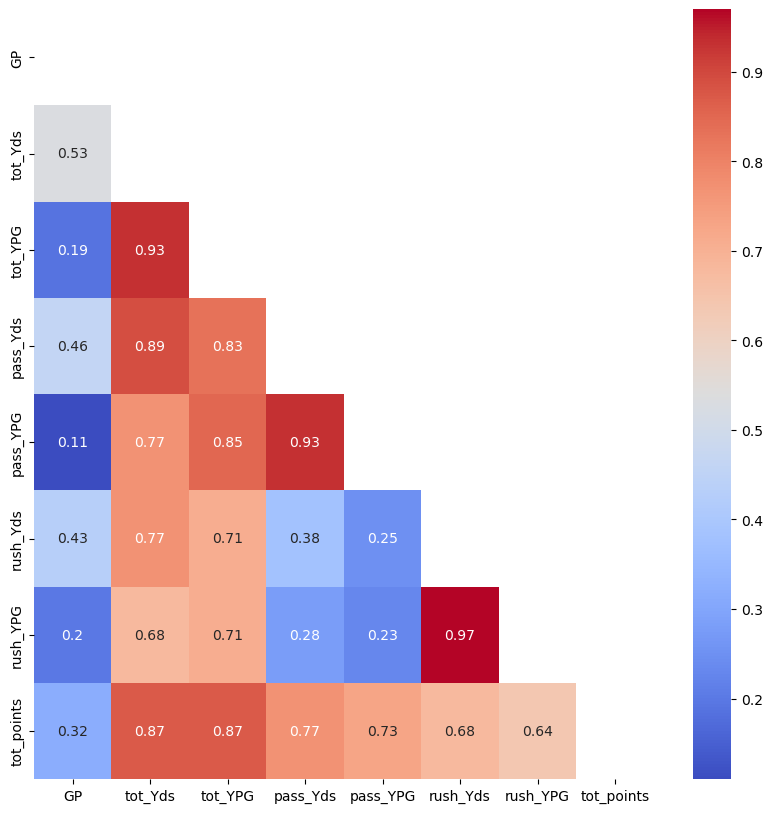

In [85]:
plt.figure(figsize=(10,10))

sns.heatmap(corrb_off.round(2), annot=True, mask=mask, cmap='coolwarm')

Obviously, we have high correlation between yards and yards/game considering that one is used as a calculation of the other. While this could be inferred, we can see the level by creating a measuring the correlation. Since games played varies between teams, we will be dropping total yards colummns and leaving yards per game columns.

Maybe we can drop games played? If we need to calculate ratios it would be helpful to have, but will not be used to predict anything on our model.

Columns we drop:
"tot_Yds", "pass_Yds", "rush_Yds" 

--------------------------------------------------------------------

In [121]:
clean_off = b_off.drop(columns=['tot_Yds', 'pass_Yds', 'rush_Yds', 'tot_points'])
clean_off.head()

,Team,GP,tot_YPG,pass_YPG,rush_YPG,PPG
0,MIA,6,498.7,316.8,181.8,37.2
1,SF,6,371.3,223.0,148.3,30.7
2,BUF,6,374.8,256.7,118.2,28.8
3,DET,6,383.7,259.5,124.2,28.0
4,PHI,6,395.0,245.0,150.0,25.8


In [130]:
X = clean_off.drop(['PPG', 'Team'], axis=1)
y = clean_off['PPG']

In [147]:
corr_clean_off = X.corr()
mask = np.triu(corr_clean_off)

<Axes: >

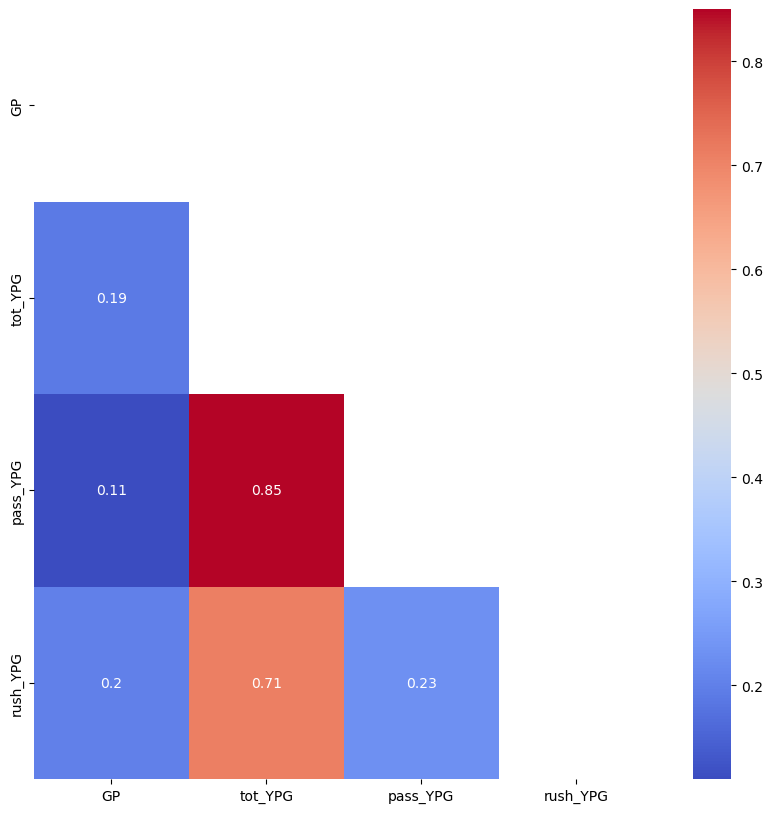

In [148]:
plt.figure(figsize=(10,10))

sns.heatmap(corr_clean_off.round(2), annot=True, mask=mask, cmap='coolwarm')

In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(corrb_off.round(2), annot=True, mask=mask, cmap='coolwarm')

Additional variables to search for:
1. Interceptions per game
2. Fumbles per game
    - while turnovers encompasses both, we should take an extra step to determine if there is a different in win probability depending on the type of turnover. If there is not, we can drop these and look for turnovers.
    - Search Sports Reference Data Set
3. Turnovers per game
--------------------------------------------------------------------
4. Depth of target
5. Formations


In [156]:
ppg_plot = clean_off.sort_values('PPG', ascending=False)
ppg_plot.head(10)
# lol this is literally how the CSV is ordered

,Team,GP,tot_YPG,pass_YPG,rush_YPG,PPG
0,MIA,6,498.7,316.8,181.8,37.2
1,SF,6,371.3,223.0,148.3,30.7
2,BUF,6,374.8,256.7,118.2,28.8
3,DET,6,383.7,259.5,124.2,28.0
4,PHI,6,395.0,245.0,150.0,25.8
5,DAL,6,329.8,210.2,119.7,25.7
6,LAC,5,365.4,259.0,106.4,25.4
7,SEA,5,332.0,227.8,104.2,24.8
8,KC,6,382.3,263.8,118.5,24.5
9,JAX,6,337.3,223.8,113.5,23.7


/Users/justintunley/anaconda3/envs/SportsBetting/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/justintunley/anaconda3/envs/SportsBetting/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/justintunley/anaconda3/envs/SportsBetting/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(0.0, 7.0)

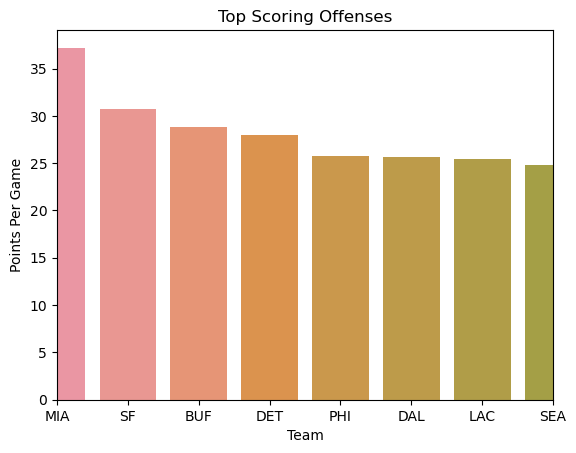

In [161]:
sns.barplot(ppg_plot, x='Team', y='PPG')
plt.title('Top Scoring Offenses')
plt.xlabel('Team')
plt.ylabel('Points Per Game')
plt.xlim(0,7)

In [169]:
totYPG_plot = clean_off.sort_values('tot_YPG', ascending=False)
RYPG_plot.head(10)
# Cleveland, Baltimore, Arizona and Chicago out of no where
# Shows that this regression will only work if I can combine with defensive metrics before the first regression
# Shows teams can gain lots of yards but fail to convert them into touchdowns. **NEED TO ADD REDZONE CONVERSION DATA**
# Teams can have great offenses but be held back by their defenses.

# Key takeaway: 3rd down and redzone conversions matter and must be added to improve model accuracy

,Team,GP,tot_YPG,pass_YPG,rush_YPG,PPG
0,MIA,6,498.7,316.8,181.8,37.2
4,PHI,6,395.0,245.0,150.0,25.8
1,SF,6,371.3,223.0,148.3,30.7
20,CLE,5,319.8,172.8,147.0,19.0
15,BAL,6,339.2,194.3,144.8,22.2
19,ARI,6,331.7,190.7,141.0,19.5
18,CHI,6,324.5,188.5,136.0,21.3
3,DET,6,383.7,259.5,124.2,28.0
5,DAL,6,329.8,210.2,119.7,25.7
28,ATL,6,331.0,212.0,119.0,16.5


In [170]:
passYPG_plot = clean_off.sort_values('pass_YPG', ascending=False)
passYPG_plot.head(10)

,Team,GP,tot_YPG,pass_YPG,rush_YPG,PPG
0,MIA,6,498.7,316.8,181.8,37.2
8,KC,6,382.3,263.8,118.5,24.5
17,MIN,6,338.7,263.7,75.0,21.5
3,DET,6,383.7,259.5,124.2,28.0
6,LAC,5,365.4,259.0,106.4,25.4
11,LAR,6,367.0,258.8,108.2,23.0
13,HOU,6,347.3,258.5,88.8,22.5
2,BUF,6,374.8,256.7,118.2,28.8
4,PHI,6,395.0,245.0,150.0,25.8
10,IND,6,345.3,228.7,116.7,23.3


In [171]:
runYPG_plot = clean_off.sort_values('rush_YPG', ascending=False)
runYPG_plot.head(10)

,Team,GP,tot_YPG,pass_YPG,rush_YPG,PPG
0,MIA,6,498.7,316.8,181.8,37.2
4,PHI,6,395.0,245.0,150.0,25.8
1,SF,6,371.3,223.0,148.3,30.7
20,CLE,5,319.8,172.8,147.0,19.0
15,BAL,6,339.2,194.3,144.8,22.2
19,ARI,6,331.7,190.7,141.0,19.5
18,CHI,6,324.5,188.5,136.0,21.3
3,DET,6,383.7,259.5,124.2,28.0
5,DAL,6,329.8,210.2,119.7,25.7
28,ATL,6,331.0,212.0,119.0,16.5


/Users/justintunley/anaconda3/envs/SportsBetting/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/justintunley/anaconda3/envs/SportsBetting/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/justintunley/anaconda3/envs/SportsBetting/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(0.0, 7.0)

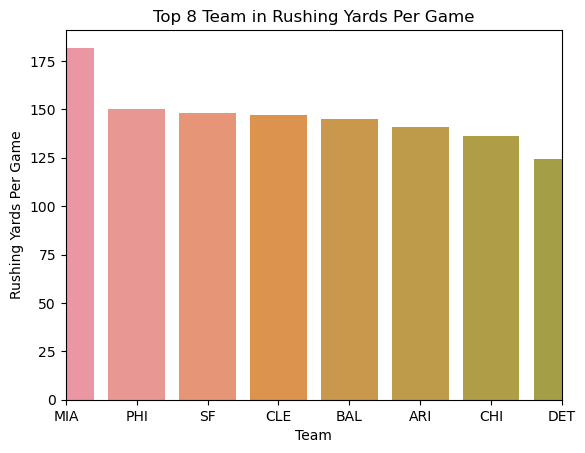

In [201]:
sns.barplot(runYPG_plot, x='Team', y='rush_YPG')
plt.title('Top 8 Team in Rushing Yards Per Game')
plt.xlabel('Team')
plt.ylabel('Rushing Yards Per Game')
plt.xlim(0,7)

## Basic Defense Data Sets
#### Upon creation of our data scraper, this dataset should be obsolite

In [179]:
defense = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/Data Sets/Big_Team_Defense.csv')

In [180]:
defense.head()

,index,Team,games_played,points_against,opp_Tot_Yds,opp_play_count,opp_Yds/Play,forced_Tos,fum_rec,opp_tot_1stD,...,opp_rushYds,opp_rushTDs,opp_rush_Y/A,opp_rush_1stD,pen_count,pen_yds,1stPy,Sc%,TO%,EXP
0,1.0,Cleveland Browns,5.0,77.0,1002.0,262.0,3.8,4.0,2.0,52.0,...,395.0,3.0,3.5,18.0,37.0,328.0,7.0,18.8,6.3,57.01
1,2.0,Dallas Cowboys,5.0,83.0,1460.0,286.0,5.1,11.0,4.0,81.0,...,617.0,4.0,4.5,30.0,31.0,265.0,12.0,26.8,19.6,36.99
2,3.0,San Francisco 49ers,6.0,87.0,1668.0,371.0,4.5,11.0,1.0,102.0,...,481.0,3.0,4.0,34.0,46.0,386.0,12.0,29.7,17.2,46.78
3,4.0,Tampa Bay Buccaneers,5.0,88.0,1654.0,322.0,5.1,10.0,4.0,94.0,...,419.0,2.0,3.7,25.0,26.0,186.0,7.0,34.6,19.2,-0.75
4,5.0,Kansas City Chiefs,6.0,88.0,1704.0,359.0,4.7,9.0,6.0,104.0,...,601.0,1.0,4.5,32.0,26.0,232.0,11.0,24.6,14.8,21.90


In [181]:
defense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           32 non-null     float64
 1   Team            32 non-null     object 
 2   games_played    32 non-null     float64
 3   points_against  32 non-null     float64
 4   opp_Tot_Yds     32 non-null     float64
 5   opp_play_count  32 non-null     float64
 6   opp_Yds/Play    32 non-null     float64
 7   forced_Tos      32 non-null     float64
 8   fum_rec         32 non-null     float64
 9   opp_tot_1stD    32 non-null     float64
 10  opp_passCmp     32 non-null     float64
 11  opp_passAtt     32 non-null     float64
 12  opp_passYds     32 non-null     float64
 13  opp_passTDs     32 non-null     float64
 14  forced_Int      32 non-null     float64
 15  opp_pass_Y/A    32 non-null     float64
 16  opp_pass_1stD   32 non-null     float64
 17  opp_rushAtt     32 non-null     float

In [182]:
defense.isnull().sum()

index             4
Team              4
games_played      4
points_against    4
opp_Tot_Yds       4
opp_play_count    4
opp_Yds/Play      4
forced_Tos        4
fum_rec           4
opp_tot_1stD      4
opp_passCmp       4
opp_passAtt       4
opp_passYds       4
opp_passTDs       4
forced_Int        4
opp_pass_Y/A      4
opp_pass_1stD     4
opp_rushAtt       4
opp_rushYds       4
opp_rushTDs       4
opp_rush_Y/A      4
opp_rush_1stD     4
pen_count         4
pen_yds           4
1stPy             4
Sc%               4
TO%               4
EXP               4
dtype: int64

In [189]:
defense = defense.dropna()

In [190]:
defense.isnull().sum()

index             0
Team              0
games_played      0
points_against    0
opp_Tot_Yds       0
opp_play_count    0
opp_Yds/Play      0
forced_Tos        0
fum_rec           0
opp_tot_1stD      0
opp_passCmp       0
opp_passAtt       0
opp_passYds       0
opp_passTDs       0
forced_Int        0
opp_pass_Y/A      0
opp_pass_1stD     0
opp_rushAtt       0
opp_rushYds       0
opp_rushTDs       0
opp_rush_Y/A      0
opp_rush_1stD     0
pen_count         0
pen_yds           0
1stPy             0
Sc%               0
TO%               0
EXP               0
dtype: int64

In [195]:
X = defense.drop(['points_against', 'index', 'Team', 'Sc%', 'games_played', 'TO%'], axis=1)
y = defense['points_against']

In [196]:
corr_defense = X.corr()
mask = np.triu(corr_defense)

<Axes: >

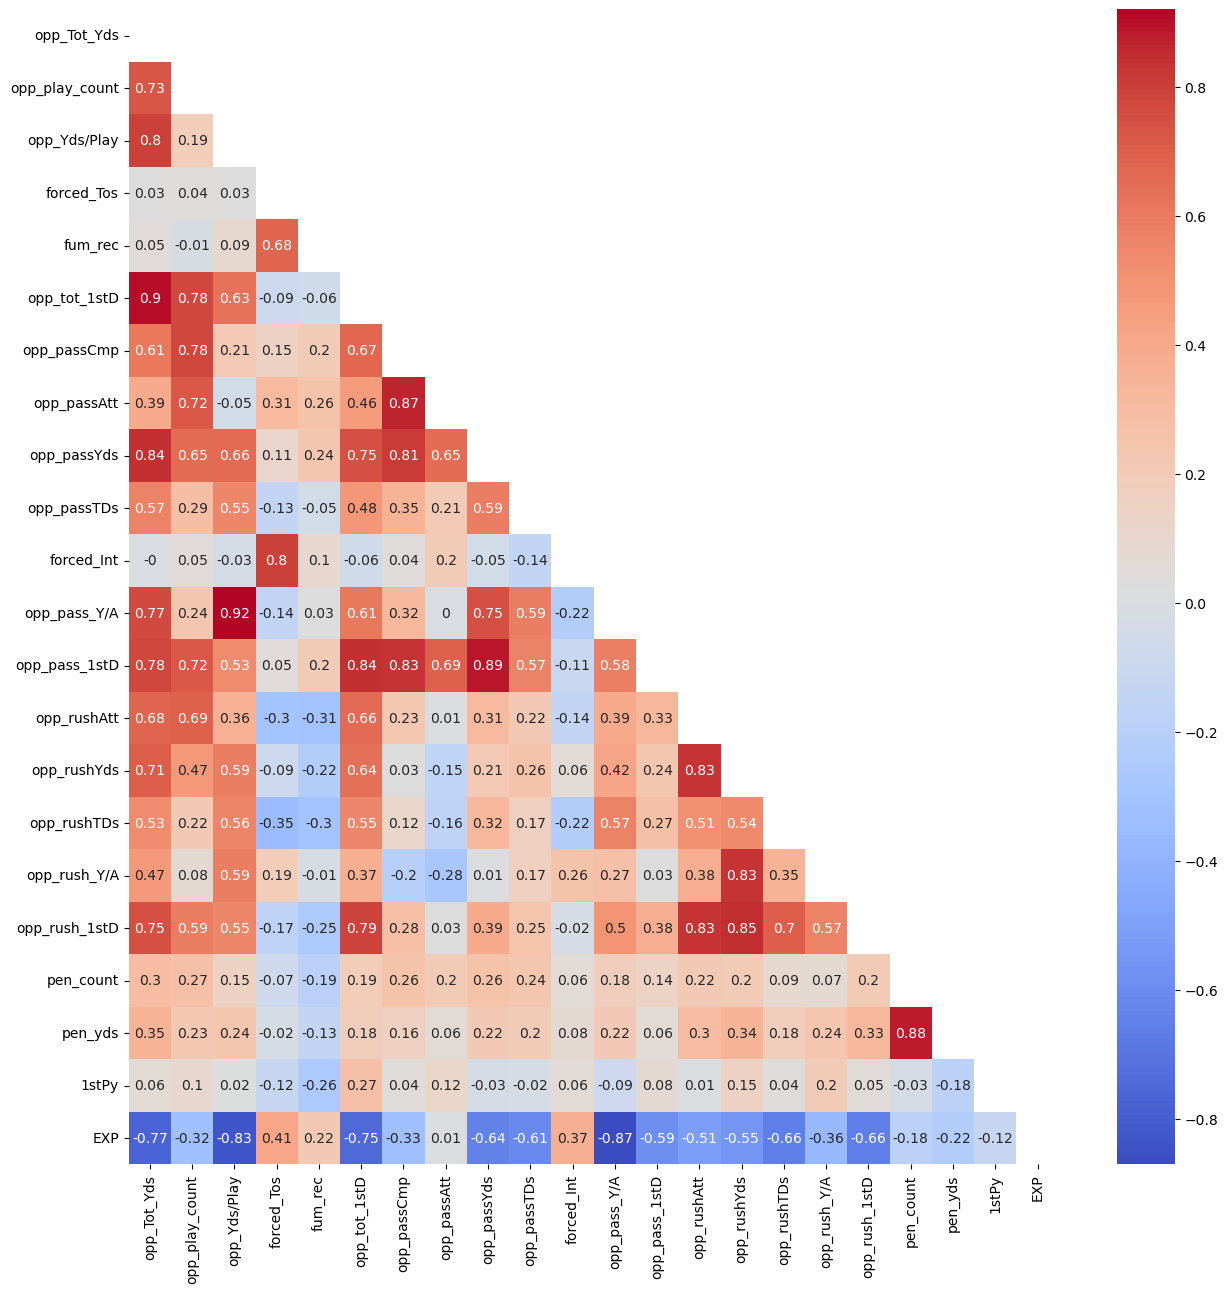

In [200]:
plt.figure(figsize=(15,15))

sns.heatmap(corr_defense.round(2), annot=True, mask=mask, cmap='coolwarm')

# NFELO Team Rankings and Stats (2023)

In [47]:
nfelo = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/Data Sets/Nfelo-Power-Rankings-2023.csv')

In [48]:
nfelo.head()

,elo_rank,wow_rank_change,team_nick,team_logo_espn,team,team_color,nfelo,_538_qb_adj,spread_val,wow_spread_val,...,point_dif_ytd_rank,net_epa_per_play_ytd_rank,epa_per_play_ytd_rank,epa_per_pass_ytd_rank,epa_per_rush_ytd_rank,epa_per_play_against_ytd_rank,epa_per_pass_against_ytd_rank,epa_per_rush_against_ytd_rank,season,week
0,1,0,49ers,https://a.espncdn.com/i/teamlogos/nfl/500/sf.png,SF,#AA0000,1719,9,9.7,1.2,...,1.0,1.0,2.0,1.0,6.0,4.0,3.0,18.0,2023,5
1,2,0,Bills,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png,BUF,#00338D,1654,12,7.1,-0.8,...,2.0,2.0,3.0,3.0,9.0,6.0,4.0,21.0,2023,5
2,3,2,Dolphins,https://a.espncdn.com/i/teamlogos/nfl/500/mia.png,MIA,#008E97,1639,22,6.5,0.9,...,5.0,3.0,1.0,2.0,2.0,23.0,23.0,20.0,2023,5
3,4,-1,Chiefs,https://a.espncdn.com/i/teamlogos/nfl/500/kc.png,KC,#E31837,1637,3,6.4,-0.0,...,4.0,4.0,6.0,4.0,24.0,8.0,6.0,19.0,2023,5
4,5,-1,Cowboys,https://a.espncdn.com/i/teamlogos/nfl/500/dal.png,DAL,#002244,1619,6,5.7,-0.5,...,3.0,5.0,19.0,15.0,15.0,2.0,7.0,1.0,2023,5


In [49]:
nfelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   elo_rank                       32 non-null     int64  
 1   wow_rank_change                32 non-null     int64  
 2   team_nick                      32 non-null     object 
 3   team_logo_espn                 32 non-null     object 
 4   team                           32 non-null     object 
 5   team_color                     32 non-null     object 
 6   nfelo                          32 non-null     int64  
 7   _538_qb_adj                    32 non-null     int64  
 8   spread_val                     32 non-null     float64
 9   wow_spread_val                 32 non-null     float64
 10  soy_spread_val                 32 non-null     float64
 11  soy_rank_change                32 non-null     int64  
 12  wins                           32 non-null     float

In [114]:
nfelo.isnull().sum()

elo_rank                          0
wow_rank_change                   0
team_nick                         0
team_logo_espn                    0
team                              0
team_color                        0
nfelo                             0
_538_qb_adj                       0
spread_val                        0
wow_spread_val                    0
soy_spread_val                    0
soy_rank_change                   0
wins                              0
points_for_ytd                    0
points_against_ytd                0
point_dif_ytd                     0
film_dif_ytd                      0
epa_per_play_ytd                  0
epa_per_pass_ytd                  0
epa_per_rush_ytd                  0
epa_per_play_against_ytd          0
epa_per_pass_against_ytd          0
epa_per_rush_against_ytd          0
net_epa_per_play_ytd              0
wepa_margin_ytd                   0
wepa_for_ytd                      0
wepa_against_ytd                  0
expected_wins_538_ytd       

# NFL Teams and Stadiums

In [47]:
teams2 = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/Data Sets/nfl_teams.csv')

In [57]:
teams2
# If scraping is not an option, this will be the key for team_ids and divisions

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [39]:
teams2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   team_name                44 non-null     object
 1   team_name_short          44 non-null     object
 2   team_id                  44 non-null     object
 3   team_id_pfr              44 non-null     object
 4   team_conference          44 non-null     object
 5   team_division            35 non-null     object
 6   team_conference_pre2002  44 non-null     object
 7   team_division_pre2002    42 non-null     object
dtypes: object(8)
memory usage: 2.9+ KB


In [55]:
teams2.duplicated().sum()

0

In [56]:
teams2.isna().sum()
# Dont really need to clean 

team_name                  0
team_name_short            0
team_id                    0
team_id_pfr                0
team_conference            0
team_division              9
team_conference_pre2002    0
team_division_pre2002      2
dtype: int64

In [ ]:
# COLUMNS TO DROP: teams_conference_pre2002, team_division_pre2002, 

# ROWS TO DROP: ALL 

In [40]:
stadiums2 = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/Data Sets/nfl_stadiums.csv', encoding='unicode_escape')
# Encoding='unicode_escape' necessary to read

In [41]:
stadiums2.head()

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_zipcode,stadium_weather_type,stadium_capacity,stadium_surface,stadium_weather_station,stadium_weather_station_name,stadium_latitude,stadium_longitude,stadium_azimuthangle,stadium_elevation
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,USW00094823,"PITTSBURGH ASOS, PA US",40.484600,-80.214400,NaN,366.7
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,NaN,NaN,29.416944,-98.478889,0.0,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,indoor,65000,Grass,NaN,NaN,36.090750,-115.183722,0.0,NaN
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,NaN,NaN,moderate,"75,024",Grass,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,warm,NaN,NaN,NaN,NaN,30.323889,-81.637500,16.7,6.1


In [42]:
stadiums2.head()

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_zipcode,stadium_weather_type,stadium_capacity,stadium_surface,stadium_weather_station,stadium_weather_station_name,stadium_latitude,stadium_longitude,stadium_azimuthangle,stadium_elevation
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,USW00094823,"PITTSBURGH ASOS, PA US",40.484600,-80.214400,NaN,366.7
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,NaN,NaN,29.416944,-98.478889,0.0,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,indoor,65000,Grass,NaN,NaN,36.090750,-115.183722,0.0,NaN
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,NaN,NaN,moderate,"75,024",Grass,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,warm,NaN,NaN,NaN,NaN,30.323889,-81.637500,16.7,6.1


In [43]:
pbp22 = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/Data Sets/Out of Scope/pbp-2022.csv')
pbp23 = pd.read_csv('/Users/justintunley/Documents/BrainStation/Capstone/Data Sets/Out of Scope/pbp-2023.csv')

In [44]:
pbp22.head()
# Very ugly datasets. Makes more sense to scrape from ESPN

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2022091106,2022-09-11,2,1,17,MIA,NE,2,10,55,NaN,0,NaN,0,(1:17) (SHOTGUN) 1-T.TAGOVAILOA SACKED AT MIA ...,0,NaN,NaN,2022,-9,SHOTGUN,SACK,0,0,0,0,NaN,1,0,0,NaN,0,0,0,0,0,0,NaN,45,OPP,0,NaN,0,NaN,0
1,2022091106,2022-09-11,3,7,4,NE,MIA,4,1,72,NaN,0,NaN,0,(7:04) (SHOTGUN) 10-M.JONES PASS INCOMPLETE DE...,0,NaN,NaN,2022,0,SHOTGUN,PASS,0,1,1,0,DEEP MIDDLE,0,0,0,NaN,0,0,0,1,0,0,NaN,28,OPP,1,MIA,1,ILLEGAL CONTACT,5
2,2022091106,2022-09-11,3,6,57,NE,MIA,1,10,77,NaN,0,NaN,0,(6:57) 38-R.STEVENSON UP THE MIDDLE TO MIA 23 ...,0,NaN,NaN,2022,0,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,CENTER,23,OPP,0,NaN,0,NaN,0
3,2022091106,2022-09-11,3,6,17,NE,MIA,2,10,77,NaN,1,NaN,0,(6:17) 10-M.JONES PASS SHORT RIGHT TO 81-J.SMI...,0,NaN,NaN,2022,15,UNDER CENTER,PASS,0,1,0,0,SHORT RIGHT,0,0,0,NaN,0,0,0,0,0,0,NaN,23,OPP,0,NaN,0,NaN,0
4,2022091106,2022-09-11,4,9,46,NE,MIA,4,3,100,NaN,0,NaN,0,(9:46) (SHOTGUN) 10-M.JONES PASS INCOMPLETE DE...,0,NaN,NaN,2022,0,SHOTGUN,PASS,0,1,1,0,DEEP MIDDLE,0,0,0,NaN,0,0,0,1,0,0,NaN,0,OPP,0,NE,0,OFFENSIVE HOLDING,0


In [45]:
pbp23.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2023092500,2023-09-25,2,2,0,PHI,TB,2,4,69,NaN,0,NaN,0,(2:00) (SHOTGUN) 1-J.HURTS LEFT TACKLE TO TB 2...,0,NaN,NaN,2023,3,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT TACKLE,31,OPP,0,NaN,0,NaN,0
1,2023092500,2023-09-25,2,2,0,PHI,TB,0,0,100,NaN,1,NaN,0,TWO-MINUTE WARNING,0,NaN,NaN,2023,0,UNDER CENTER,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OPP,0,NaN,0,NaN,0
2,2023092500,2023-09-25,2,2,26,PHI,TB,1,10,63,NaN,0,NaN,0,(2:26) (SHOTGUN) 14-K.GAINWELL UP THE MIDDLE T...,0,NaN,NaN,2023,6,SHOTGUN,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,CENTER,37,OPP,0,NaN,0,NaN,0
3,2023092500,2023-09-25,2,3,32,TB,PHI,0,0,65,NaN,1,NaN,0,4-J.ELLIOTT KICKS 65 YARDS FROM PHI 35 TO END ...,0,NaN,NaN,2023,0,UNDER CENTER,KICK OFF,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,35,OPP,0,NaN,0,NaN,0
4,2023092500,2023-09-25,2,3,32,TB,PHI,0,0,100,NaN,1,NaN,0,TIMEOUT AT 03:32.,0,NaN,NaN,2023,0,UNDER CENTER,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OPP,0,NaN,0,NaN,0
